Analisar os níveis de energia no processo adiabático

In [7]:
import numpy as np

def P1(J, h, T):
    denominador = (np.exp(-h/T) + 1 + np.exp(h/T) + np.exp(J/T))
    numerador = np.exp(-h/T)
    P1 = numerador/denominador  
    
    return P1

def P2(J, h, T):
    denominador = (np.exp(-h/T) + 1 + np.exp(h/T) + np.exp(J/T))
    numerador = 1
    P2 = numerador/denominador  
    
    return P2

def P3(J, h, T):
    denominador = (np.exp(-h/T) + 1 + np.exp(h/T) + np.exp(J/T))
    numerador = np.exp(h/T)
    P3 = numerador/denominador  
    
    return P3

def P4(J, h, T):
    denominador = (np.exp(-h/T) + 1 + np.exp(h/T) + np.exp(J/T))
    numerador = np.exp(J/T)
    P4 = numerador/denominador  
    
    return P4

Plotando P1,P2,P3 e P4

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_P1P2P3P4_T(J, h_values, T_values):
    
    #[h_values, T_values, M_values, S_values, temperature_guess] = calcula_T(J, hi, hf, T)
    
    
    
    P1_values = P1(J, h_values, T_values)
    P2_values = P2(J, h_values, T_values)
    P3_values = P3(J, h_values, T_values)
    P4_values = P4(J, h_values, T_values)

    plt.figure(figsize=(10, 6))

    plt.plot(T_values, P1_values, label='P1(T)')
    plt.plot(T_values, P2_values, label='P2(T)')
    plt.plot(T_values, P3_values, label='P3(T)')
    plt.plot(T_values, P4_values, label='P4(T)')

    plt.xlabel('T (Temperatura)')
    plt.ylabel('Probabilidade')
    plt.title('Probabilidades P1 = +h, P2 = 0, P3 = -h e P4 = -J em função de T')

    plt.legend()
    plt.grid(True)
    plt.show()
    
    
def plot_P1P2P3P4_h(J, h_values, T_values):


    P1_values = P1(J, h_values, T_values)
    P2_values = P2(J, h_values, T_values)
    P3_values = P3(J, h_values, T_values)
    P4_values = P4(J, h_values, T_values)


    plt.figure(figsize=(10, 6)) # Define o tamanho da figura do gráfico

    plt.plot(h_values, P1_values, label='P1(h)')
    plt.plot(h_values, P2_values, label='P2(h)')
    plt.plot(h_values, P3_values, label='P3(h)')
    plt.plot(h_values, P4_values, label='P4(h)')

    plt.xlabel('h')
    plt.ylabel('Probabilidade')
    plt.title('Probabilidades P1 = +h, P2 = 0, P3 = -h e P4 = -J em função de h')

    plt.legend()

    plt.grid(True)

    plt.show()
    

def plot_P1P2P3P4_3D(J, h_values, T_values):
    H, T_grid = np.meshgrid(h_values, T_values)

    # Calcular os valores das funções para cada ponto na grade
    # Cada P_values será uma matriz 2D correspondente à grade (H, T_grid)
    P1_values_3d = P1(J, H, T_grid)
    P2_values_3d = P2(J, H, T_grid)
    P3_values_3d = P3(J, H, T_grid)
    P4_values_3d = P4(J, H, T_grid)

    # Configurar e plotar o gráfico 3D
    fig = plt.figure(figsize=(12, 10)) # Define o tamanho da figura
    ax = fig.add_subplot(111, projection='3d') # Adiciona um subplot 3D

    # Plotar cada função como uma superfície 3D
    # 'alpha' controla a transparência da superfície
    ax.plot_surface(H, T_grid, P1_values_3d, cmap='viridis', alpha=0.7, label='P1(h, T)')
    ax.plot_surface(H, T_grid, P2_values_3d, cmap='plasma', alpha=0.7, label='P2(h, T)')
    ax.plot_surface(H, T_grid, P3_values_3d, cmap='cividis', alpha=0.7, label='P3(h, T)')
    ax.plot_surface(H, T_grid, P4_values_3d, cmap='magma', alpha=0.7, label='P4(h, T)')

    # Adicionar rótulos aos eixos e título ao gráfico
    ax.set_xlabel('h')
    ax.set_ylabel('T (Temperatura)')
    ax.set_zlabel('Probabilidade')
    ax.set_title('Probabilidades P1, P2, P3 e P4 em função de h e T')

    # Para a legenda funcionar corretamente em 3D, é preciso um pequeno truque:
    # Criar proxies para as legendas, pois plot_surface não as adiciona diretamente
    from matplotlib.lines import Line2D
    handles = [Line2D([0], [0], linestyle="none", c=plt.cm.viridis(0.5), marker='s', markersize=10, label='P1(h, T)'),
            Line2D([0], [0], linestyle="none", c=plt.cm.plasma(0.5), marker='s', markersize=10, label='P2(h, T)'),
            Line2D([0], [0], linestyle="none", c=plt.cm.cividis(0.5), marker='s', markersize=10, label='P3(h, T)'),
            Line2D([0], [0], linestyle="none", c=plt.cm.magma(0.5), marker='s', markersize=10, label='P4(h, T)')]
    ax.legend(handles=handles)

    # Exibir o gráfico
    plt.show()


Gerando T no processo Adiabático

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def Temp(J, h, T, entropy):    
    function = (entropy - entropia(J, h, T)) 
    return function


def calcula_T(J, hi, hf, T):
    
    #calculando a entropia para os valores iniciais do problema, e depois precisamos garantir que ela vai ser constante durante todo o processo
    S = round(entropia(J, hi, T), 5)   
    #print(f"entropia incial = {S}")
    
    
    temperature_guess = T
    temperatures = []
    #temperatura_guess é a temperatura inicial do banho quente ou frio, onde há equilibrio termodinamico
    
    
    #criando um linspace de h de hi até hf
    h_values = np.linspace(hi, hf, 200)
    print(f"h_values: {h_values}")
    S_values = np.zeros_like(h_values)
    T_values = np.zeros_like(h_values)
    M_values = np.zeros_like(h_values)
    
    
    for i, h in enumerate(h_values):
        calculed_temperature = fsolve(lambda temperature: Temp(J, h, temperature, S), temperature_guess)
        
        
        T_values[i] = calculed_temperature[0]
        S_values[i] = round(entropia(J, h, T_values[i]), 10)
        S = S_values[i]
        M_values[i] = round(magnetizacao(J, h, T_values[i]), 10)
        
        temperatures.append(calculed_temperature[0])
        
        
        temperature_guess = calculed_temperature[0]
        #print(f"T_values[i] = {T_values[i]}, Temperature_guess = {temperature_guess}, entropia[i] = {S_values[i]}")
    return [h_values, T_values, M_values, S_values, temperature_guess]


h_values: [1.         1.00502513 1.01005025 1.01507538 1.0201005  1.02512563
 1.03015075 1.03517588 1.04020101 1.04522613 1.05025126 1.05527638
 1.06030151 1.06532663 1.07035176 1.07537688 1.08040201 1.08542714
 1.09045226 1.09547739 1.10050251 1.10552764 1.11055276 1.11557789
 1.12060302 1.12562814 1.13065327 1.13567839 1.14070352 1.14572864
 1.15075377 1.15577889 1.16080402 1.16582915 1.17085427 1.1758794
 1.18090452 1.18592965 1.19095477 1.1959799  1.20100503 1.20603015
 1.21105528 1.2160804  1.22110553 1.22613065 1.23115578 1.2361809
 1.24120603 1.24623116 1.25125628 1.25628141 1.26130653 1.26633166
 1.27135678 1.27638191 1.28140704 1.28643216 1.29145729 1.29648241
 1.30150754 1.30653266 1.31155779 1.31658291 1.32160804 1.32663317
 1.33165829 1.33668342 1.34170854 1.34673367 1.35175879 1.35678392
 1.36180905 1.36683417 1.3718593  1.37688442 1.38190955 1.38693467
 1.3919598  1.39698492 1.40201005 1.40703518 1.4120603  1.41708543
 1.42211055 1.42713568 1.4321608  1.43718593 1.4422110

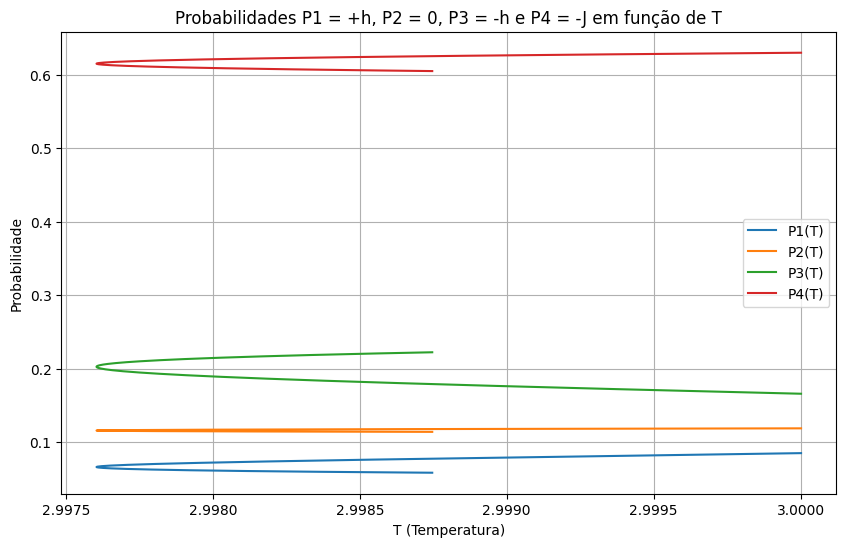

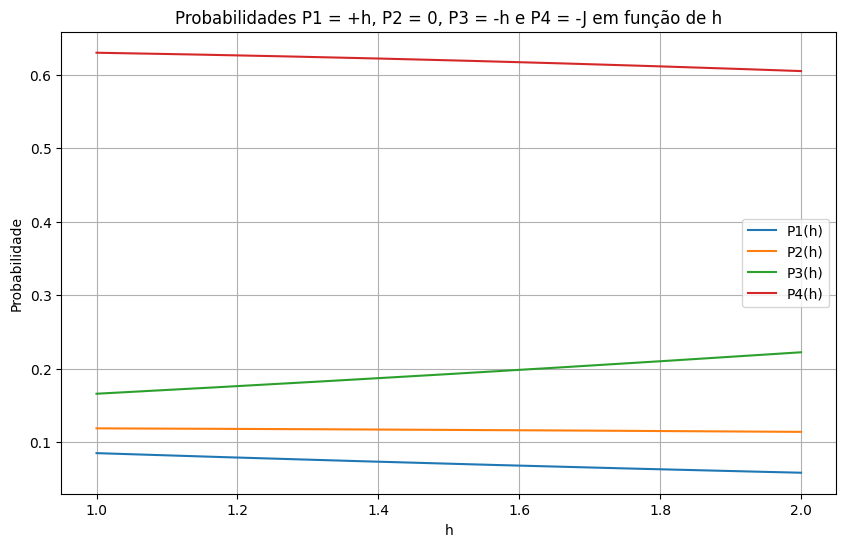

In [79]:
#plot_P1P2P3P4(J, hi, hf , T)
J = 5
[h_values, T_values, M_values, S_values, temperature_guess] = calcula_T(J, 1, 2, 3)

plot_P1P2P3P4_T(J, h_values, T_values)

plot_P1P2P3P4_h(J, h_values, T_values)

#plot_P1P2P3P4_3D(J, h_values, T_values)

-------------------


O codigo antigo começa aqui

In [6]:
import numpy as np

def Z(J,h,T):
    Z = 1 + 2*(np.cosh(h/T)) + np.exp(J/T)
    return Z

def energia_Livre(J, h, T):
    F = (-1) * T * (np.log(Z(J, h, T)))
    return F

def energia_Media(J, h, T):
    numerador = ((-1) * ((J * np.exp(J/T)) + (2 * h * np.sinh(h/T)))) 
    denominador = Z(J, h, T)
    U = (numerador / denominador)
    return U

def entropia(J, h, T):
    numerador = (((-1) * ((J*np.exp(J/T)) + (2*h*np.sinh(h/T))))/T)
    denominador = Z(J, h, T)
    S = (np.log(Z(J, h, T)) + (numerador / denominador))
    return S 

def magnetizacao(J, h, T):
    numerador = (2 * np.sinh(h/T))
    denominador = Z(J, h, T)
    M = (numerador / denominador)
    return M

def susceptibilidade(J, h, T):
    term1 = ((2 * np.cosh(h/T)) / (T * Z(J, h, T)))
    term2 = ((4 * (np.sinh(h/T))**2) / (T * (Z(J, h, T))**2))
    X = term1 - term2
    return X

Plotando:$\\$
Energia Livre de Helmholtz: $\rightarrow F(J, h, T)\\$
Energia Média: $\rightarrow U(J, h, T)\\$
Entropia: $\rightarrow S(J, h, T)\\$
Magnetização: $\rightarrow M(J, h, T)\\$
Susceptibilidade: $\rightarrow X(J, h, T)\\$

En função de $h = [-2,2]$, para diferentes valores $T = (0.1, 0.4, 1)$, com $J=0$ constante 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def plot_FB_UB_SB_MB_XM(J, h, Temperature):
    
    #definindo os valores de T
    T_values = Temperature
    J_values = J
    #criando os intervalos de h
    h_values = np.linspace(-h,h, 200)

    plt.figure(figsize=(18,6))


    for T in T_values:
        U_values = [energia_Media(J, h, T) for h in h_values]
        S_values = [entropia(J, h, T) for h in h_values]
        M_values = [magnetizacao(J, h, T) for h in h_values]
        X_values = [susceptibilidade(J, h, T) for h in h_values]

        # U x h
        plt.subplot(1, 4, 1)
        plt.plot(h_values, U_values, label=f"T = {T}")
        plt.xlabel('h')
        plt.ylabel('U')
        plt.title('U vs. h')
        plt.grid(True)
        plt.legend()

        # S x h
        plt.subplot(1, 4, 2)
        plt.plot(h_values, S_values, label=f"T = {T}")
        plt.xlabel('h')
        plt.ylabel('S')
        plt.title('S vs. h')
        plt.grid(True)
        plt.legend()

        # M x h
        plt.subplot(1, 4, 3)
        plt.plot(h_values, M_values, label=f"T = {T}")
        plt.xlabel('h')
        plt.ylabel('M')
        plt.title('M vs. h')
        plt.grid(True)
        plt.legend()
        
        # X x h
        plt.subplot(1, 4, 4)
        plt.plot(h_values, X_values, label=f"T = {T}")
        plt.xlabel('h')
        plt.ylabel('X')
        plt.title('X vs. h')
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

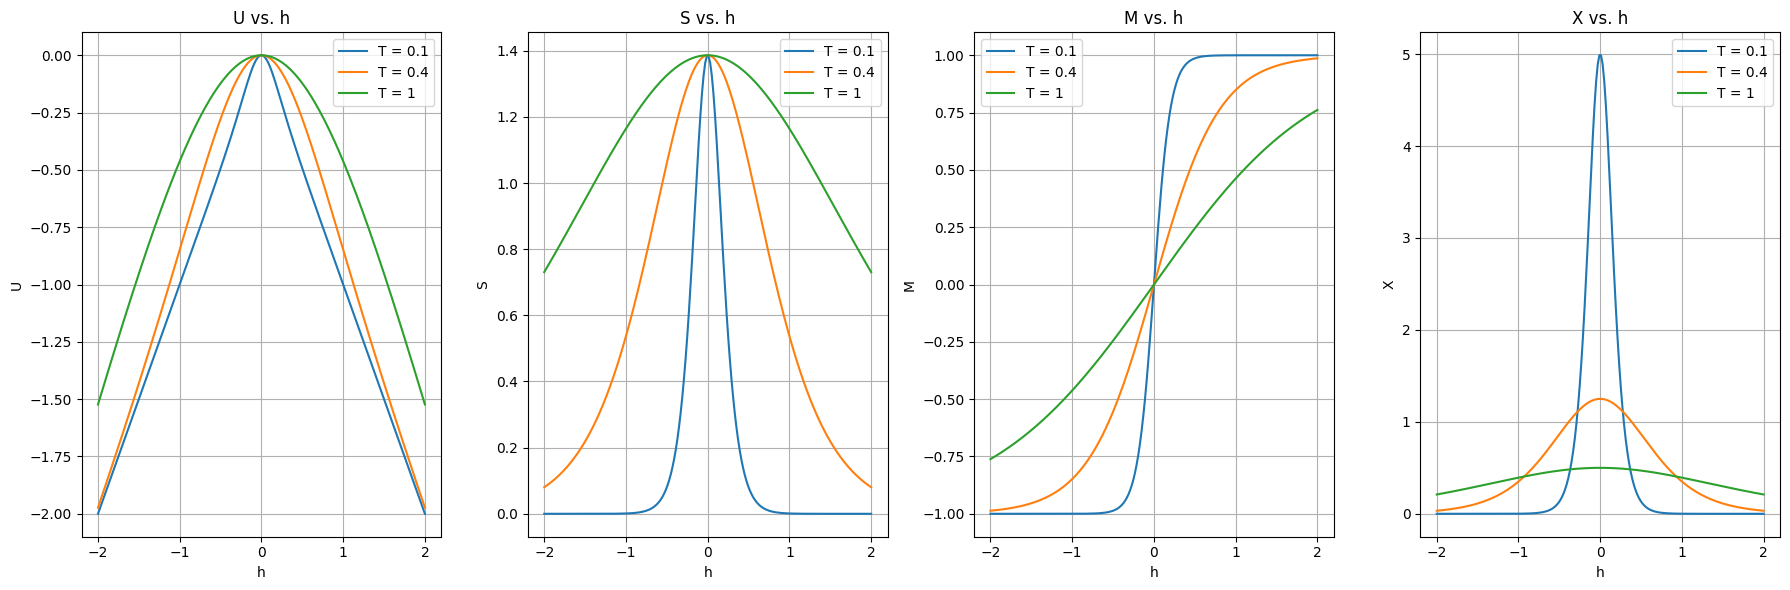

In [3]:
J = 0
h = 2
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

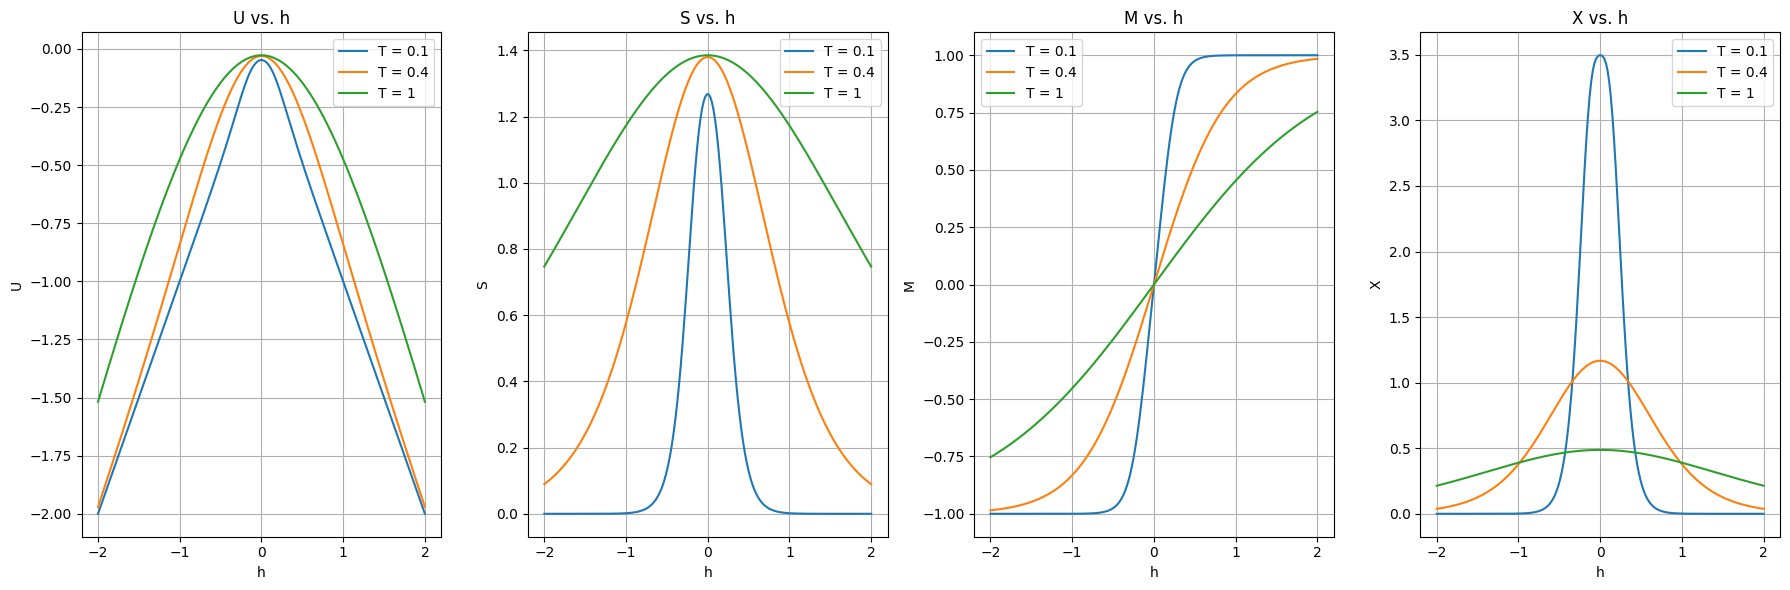

In [4]:
J = 0.1
h = 2
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

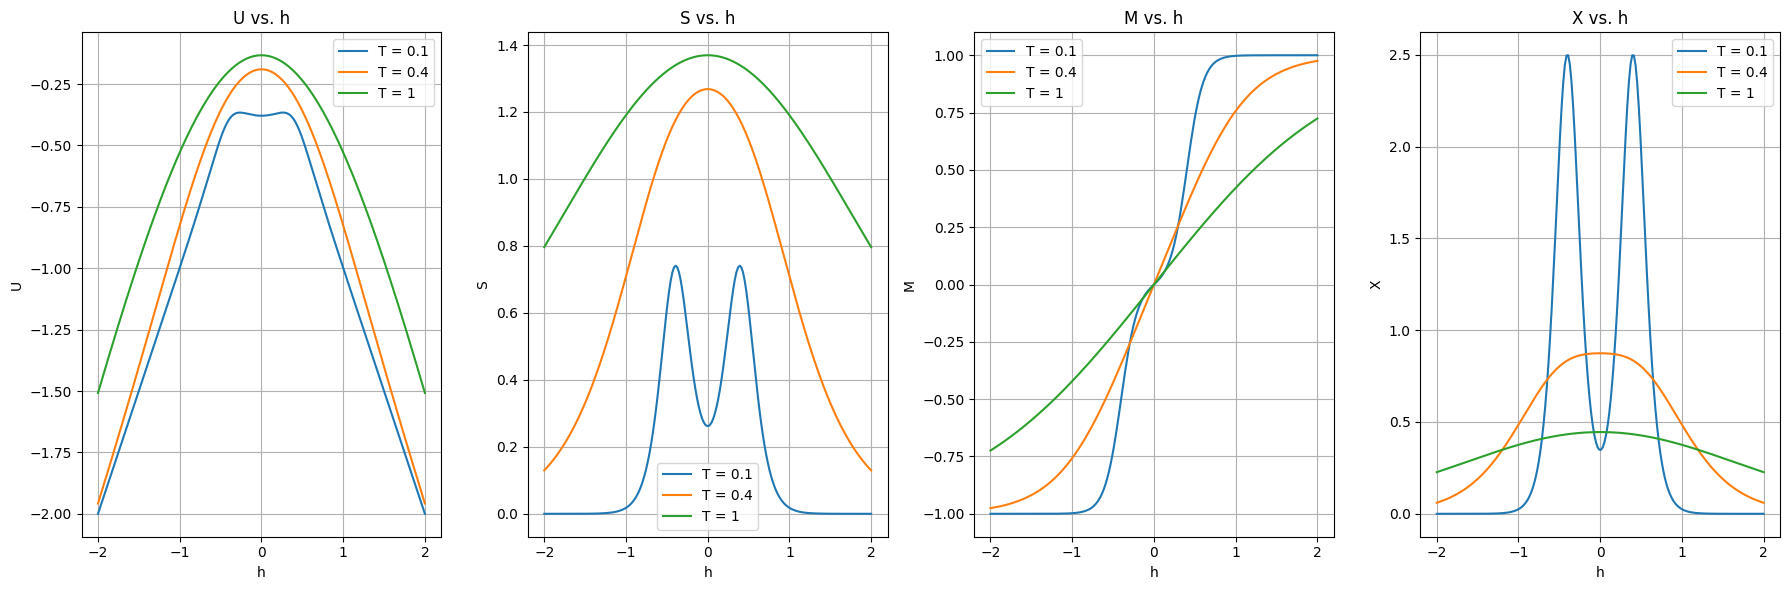

In [5]:
J = 0.4
h = 2
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

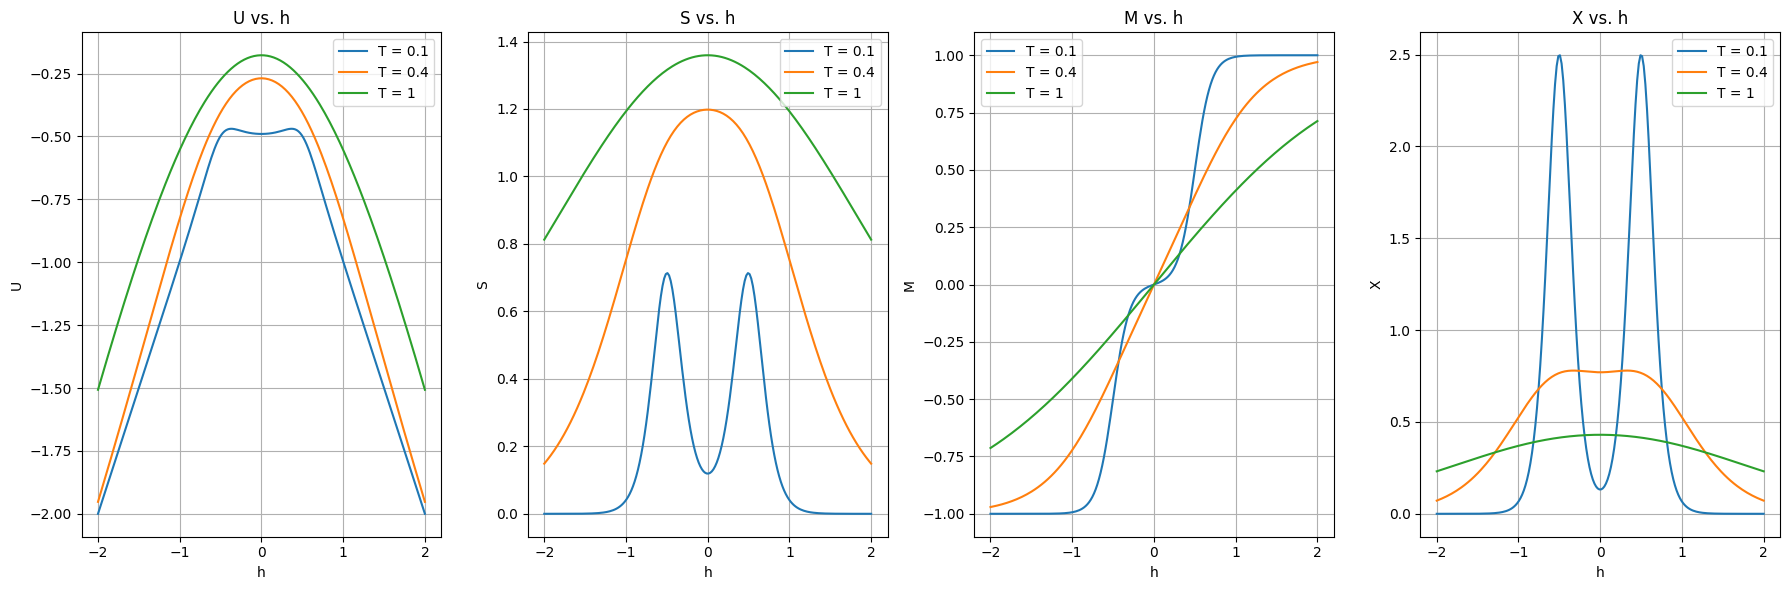

In [6]:
J = 0.5
h = 2
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

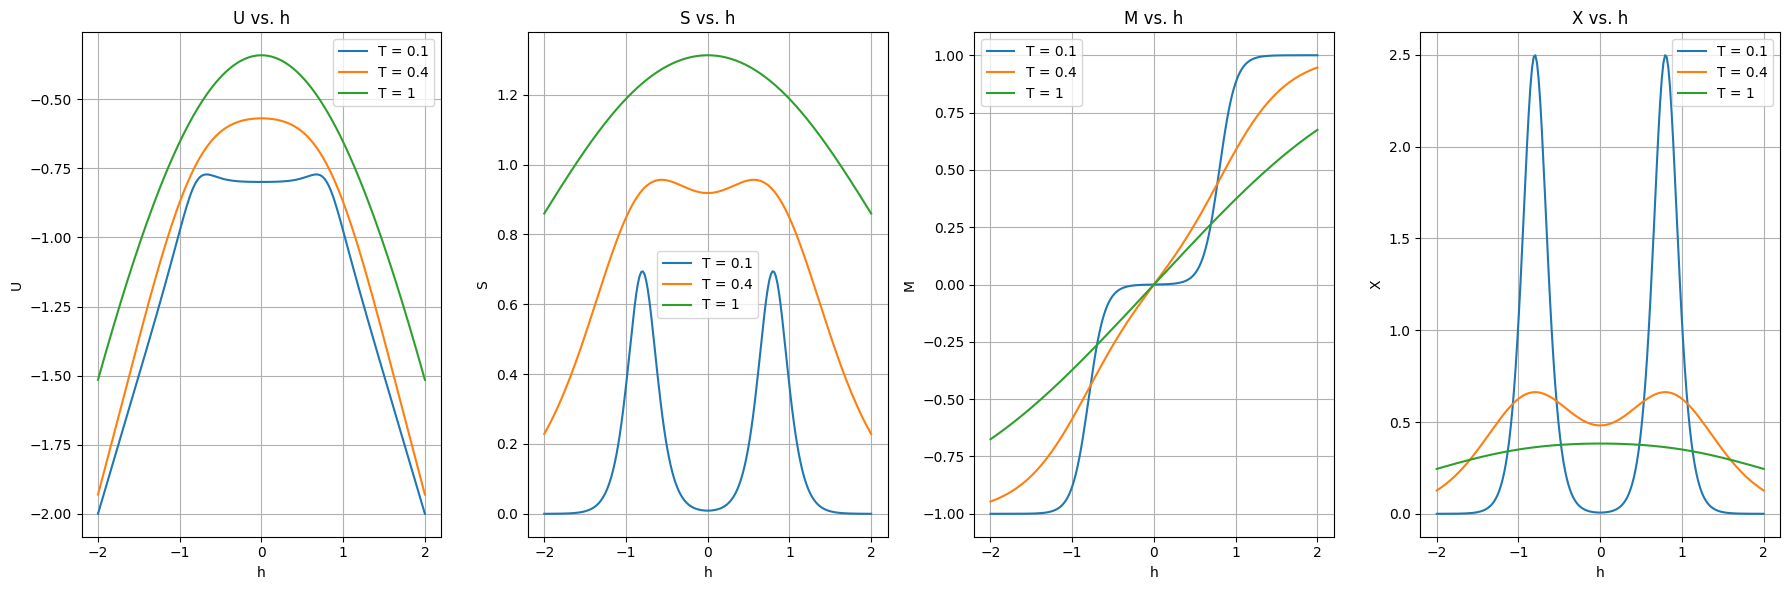

In [6]:
J = 0.8
h = 2
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

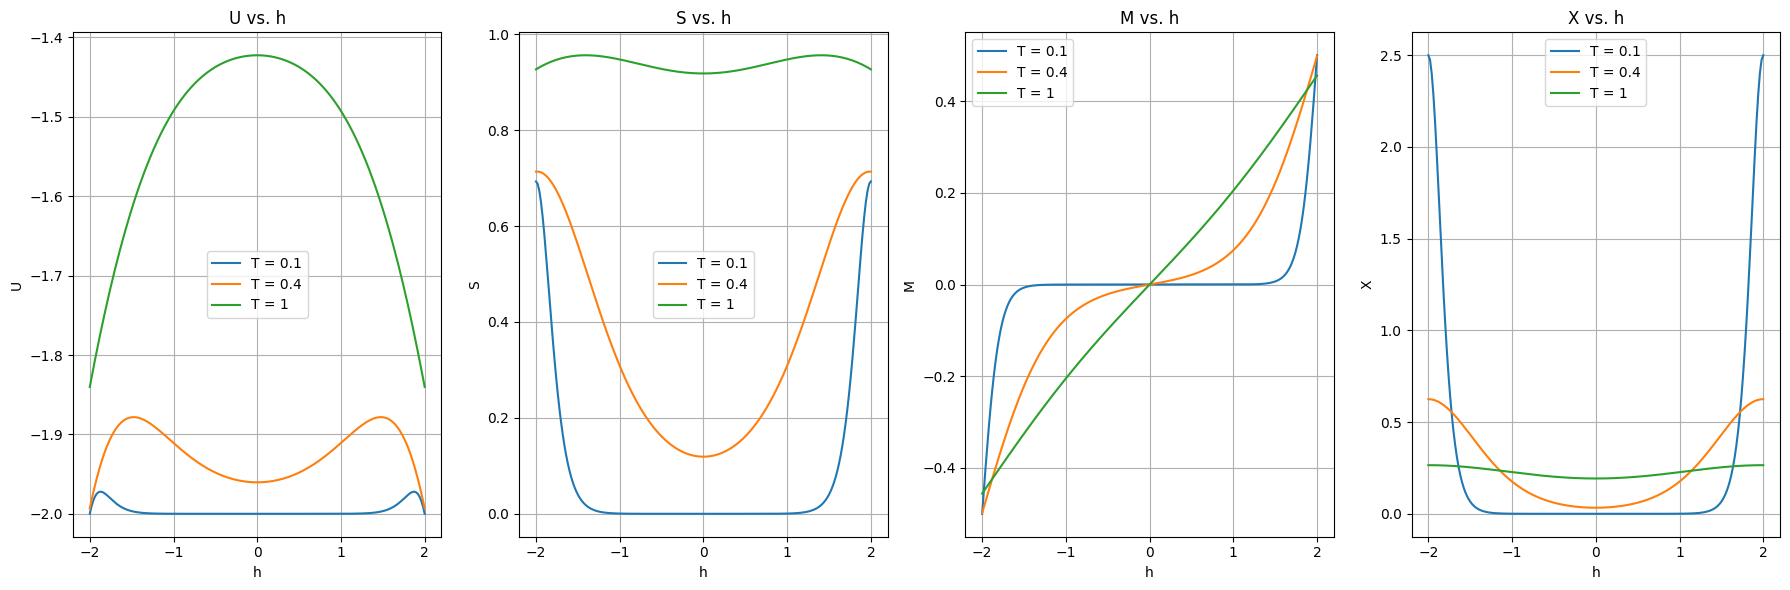

In [7]:
J = 2
h = 2
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

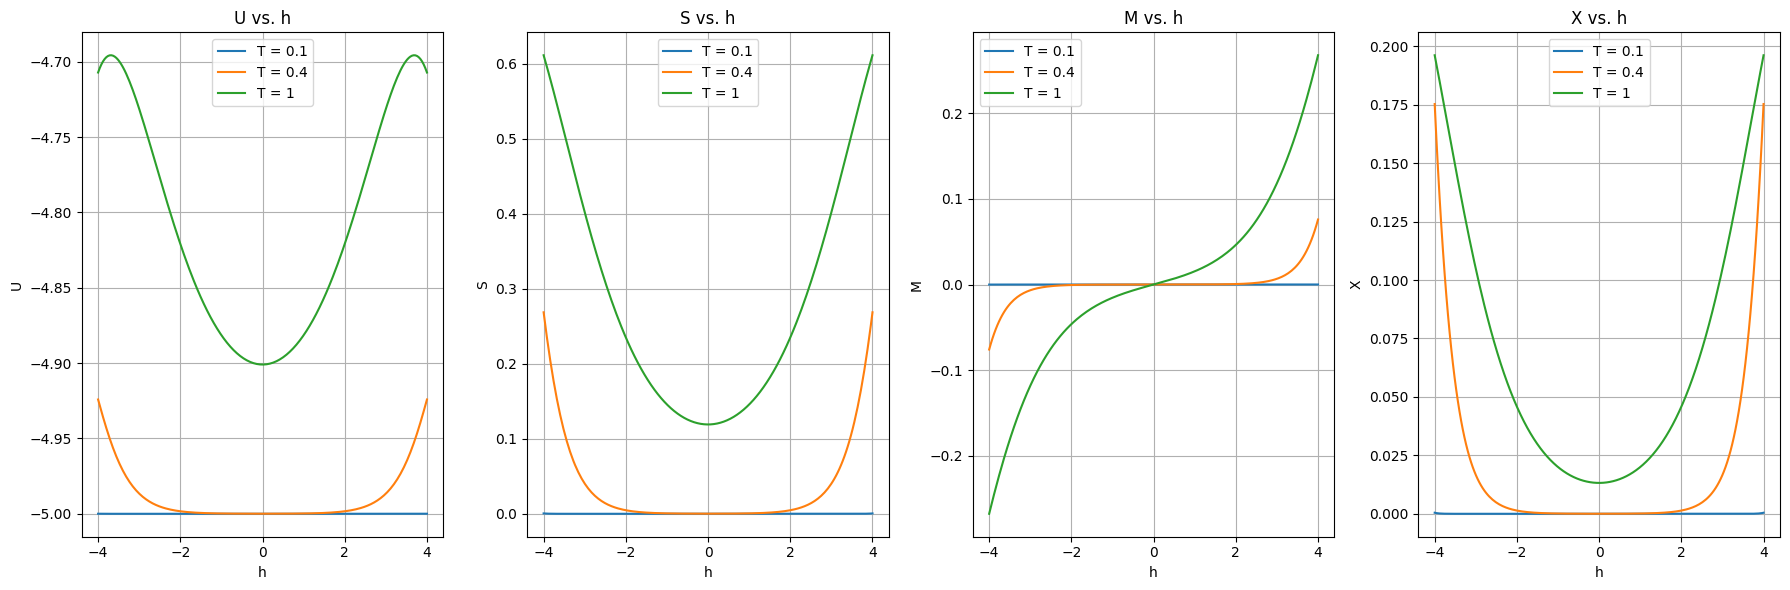

In [8]:
J = 5
h = 4
T = [0.1, 0.4, 1]

plot_FB_UB_SB_MB_XM(J, h, T)

Agora, vamos analisar o comportamento da $\underline{Magnetização}$ $\rightarrow M(J, h, T)$ conforme a temperatura aumenta, para diferentes valores fixos de J e h.

In [9]:
def plot_MT(J, h, T):
    
    T_values = np.linspace(0.01, T, 200)
    J_values = J
    h_values = h
    
    
    
    for J in J_values:
        for h in h_values:
            M_values = [magnetizacao(J, h, T) for T in T_values]
            plt.plot(T_values, M_values, label=f"h = {h}, J = {J} ")
            
        plt.xlabel('T')
        plt.ylabel('M')
        plt.title(f"M vs. T, J = {J}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

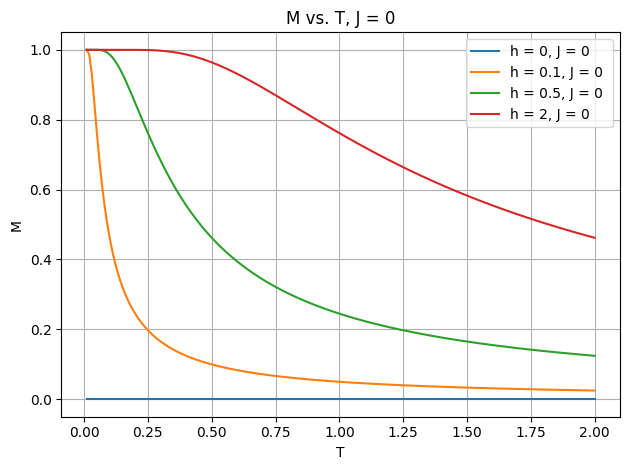

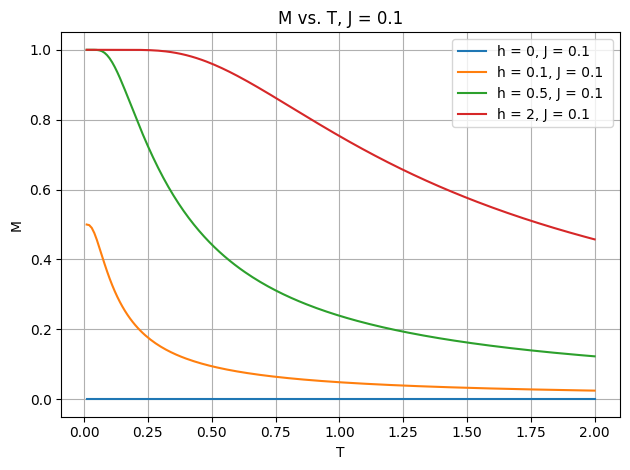

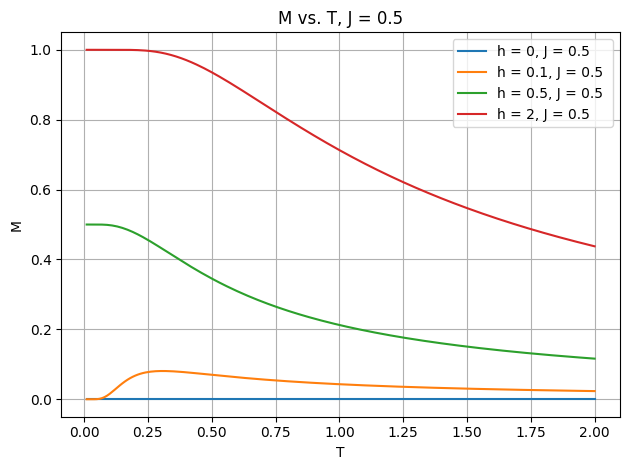

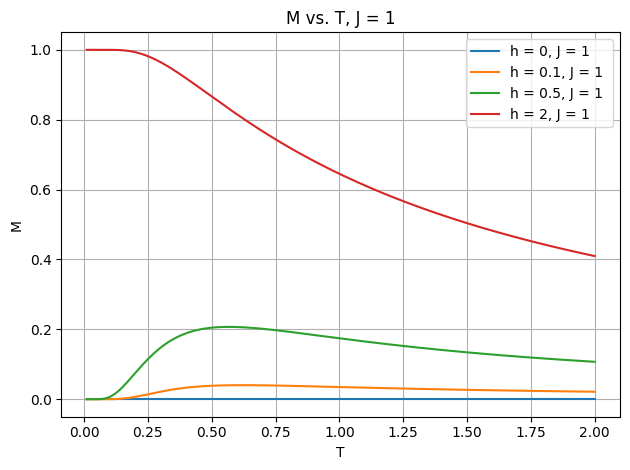

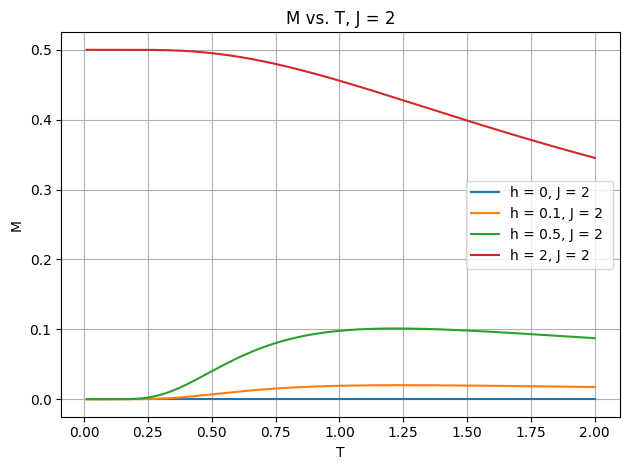

In [10]:
J = [0, 0.1, 0.5, 1, 2]
h = [0, 0.1, 0.5 , 2]
# T define o limite final do gráfico: [0.01, T]
T=2

plot_MT(J, h, T)

Agora, vamos analisar o comportamento da $\underline{Entropia}$ $\rightarrow S(J, h, T)$ conforme a temperatura aumenta, para diferentes valores fixos de J e h.

In [11]:
def plot_ST(J, h, T):
    
    T_values = np.linspace(0.01, T, 200)
    J_values = J
    h_values = h
    
    
    
    for J in J_values:
        for h in h_values:
            S_values = [entropia(J, h, T) for T in T_values]
            plt.plot(T_values, S_values, label=f"h = {h}, J = {J} ")
            
        plt.xlabel('T')
        plt.ylabel('S')
        plt.title(f"S vs. T")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

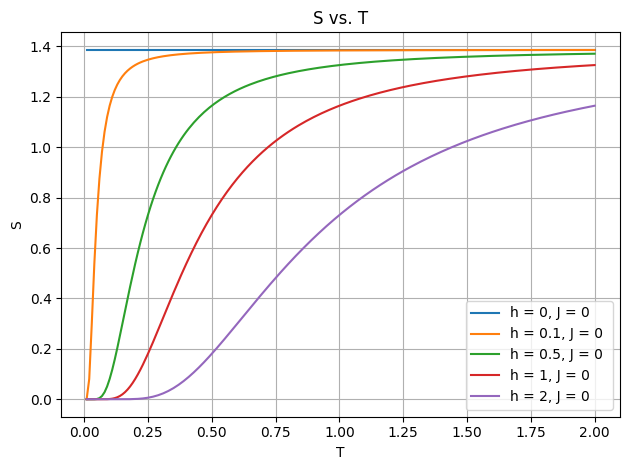

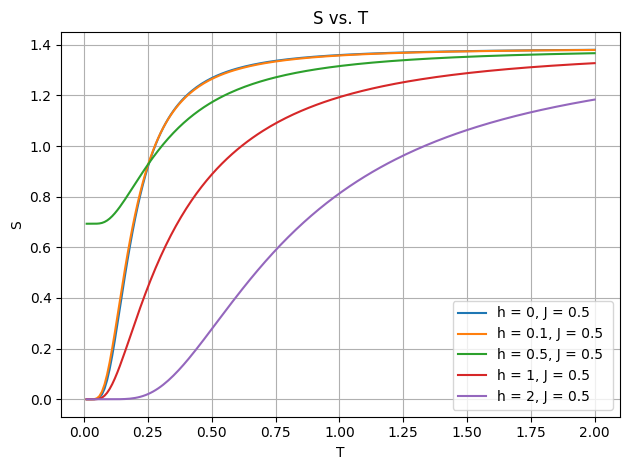

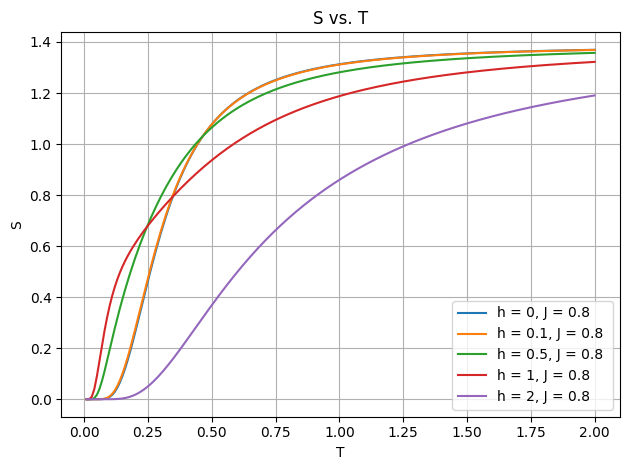

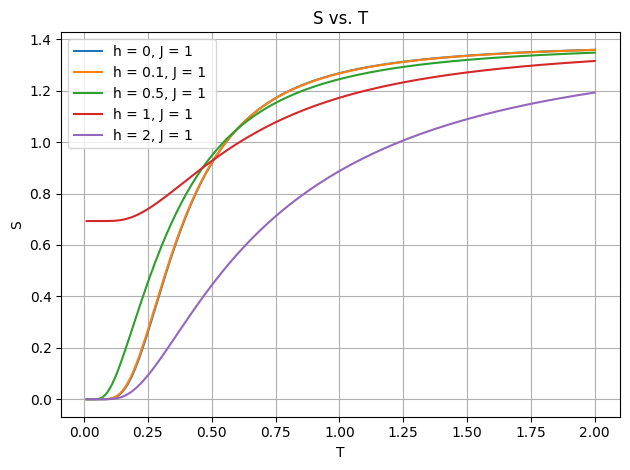

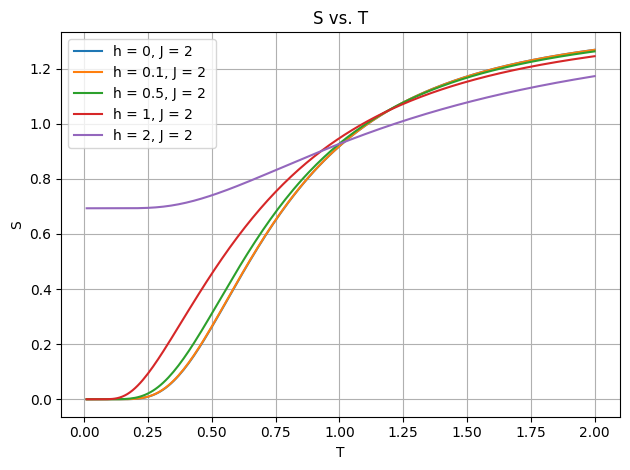

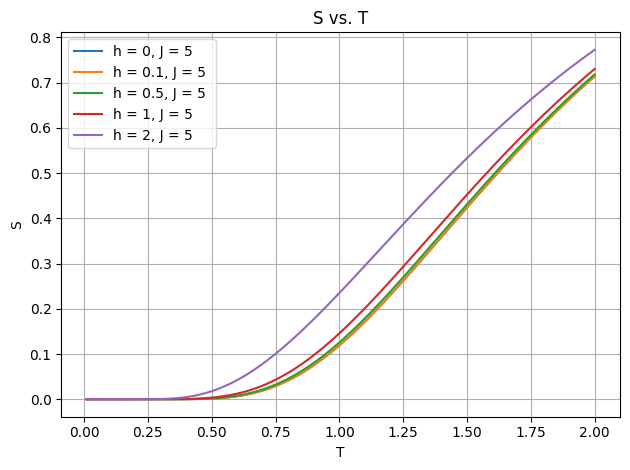

In [12]:
J = [0, 0.5, 0.8, 1, 2, 5]
h = [0, 0.1, 0.5, 1, 2]
# T define o limite final do gráfico: [0.01, T]
T=2

plot_ST(J, h, T)

Agora, vamos analisar o comportamento da $\underline{Energia Média}$ $\rightarrow U(J, h, T)$ conforme a temperatura aumenta, para diferentes valores fixos de J e h.

In [13]:
def plot_UT(J, h, T):
    
    T_values = np.linspace(0.01, T, 200)
    J_values = J
    h_values = h
    
    
    
    for J in J_values:
        for h in h_values:
            U_values = [energia_Media(J, h, T) for T in T_values]
            plt.plot(T_values, U_values, label=f"h = {h}, J = {J} ")
            
        plt.xlabel('T')
        plt.ylabel('U')
        plt.title(f"U vs. T, J = {J}")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

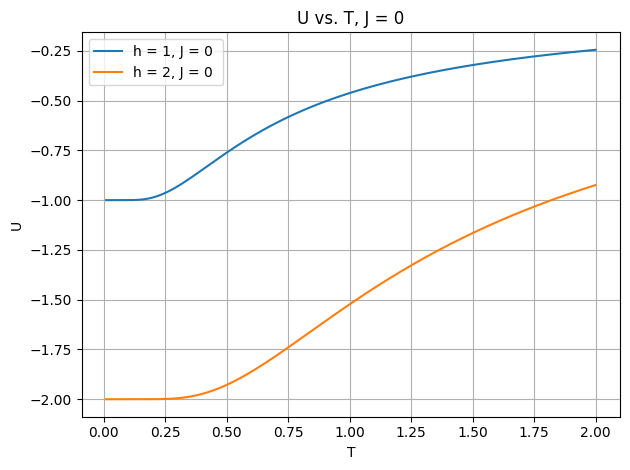

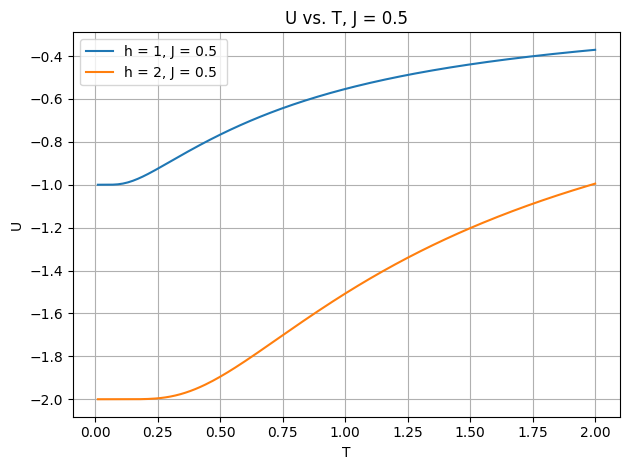

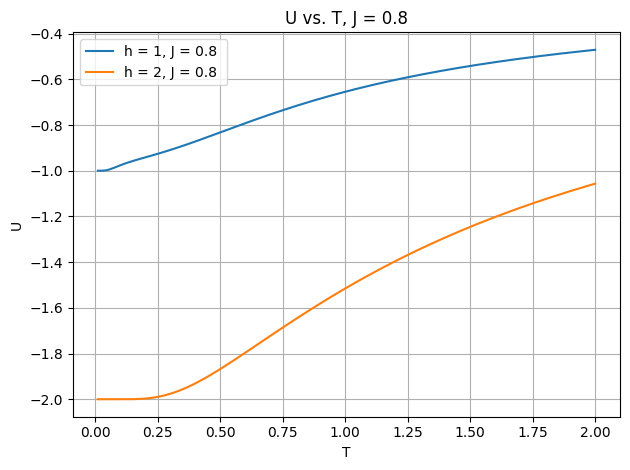

In [14]:
J = [0, 0.5, 0.8]
h = [1, 2]
# T define o limite final do gráfico: [0.01, T]
T=2

plot_UT(J, h, T)

--------

Vamos analisar os Counterplot. Aqui, buscaremos entender o comportamento da Entropia e do Magnetismo em uma determinada região. Assim, podemos comparar dois gráficos.

In [15]:
import numpy as np
import matplotlib.pyplot as plt

def counterplot_M_ht(J):
    h_values = np.linspace(0.01, 2, 1_000)
    T_values = np.linspace(0.01, 3, 1_000)


    H, T = np.meshgrid(h_values, T_values)

    M = magnetizacao(J, H ,T)
    S = entropia(J, H, T)

    # Criando a figura com dois subplots
    plt.figure(figsize=(16, 6))

    # Magnetização
    plt.subplot(1, 2, 1)
    contour1 = plt.contourf(H, T, M, levels=50, cmap='coolwarm')
    plt.colorbar(contour1, label='Magnetização M')
    plt.xlabel('Campo h')
    plt.ylabel('Temperatura T')
    plt.title(f'Magnetização M(h, T) para J = {J}')
    plt.grid(True)

    # Entropia
    plt.subplot(1, 2, 2)
    contour2 = plt.contourf(H, T, S, levels=50, cmap='viridis')
    plt.colorbar(contour2, label='Entropia S')
    plt.xlabel('Campo h')
    plt.ylabel('Temperatura T')
    plt.title(f'Entropia S(h, T) para J = {J}')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

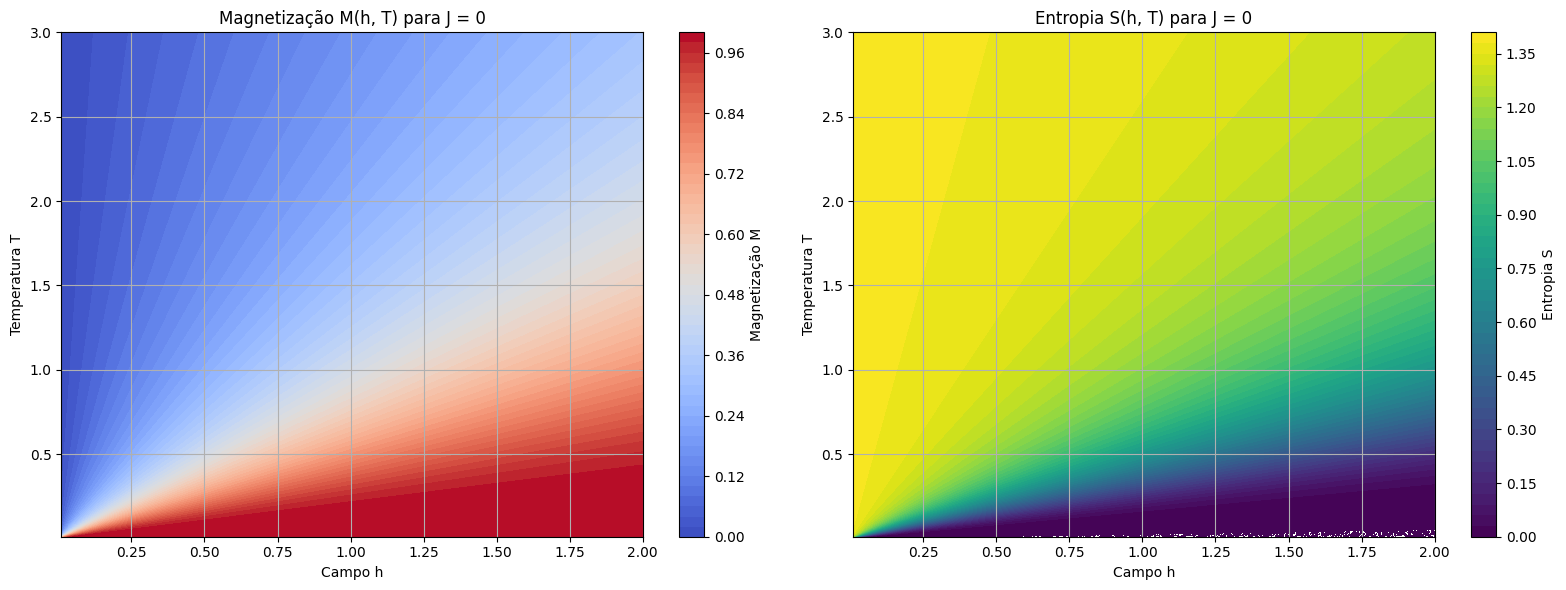

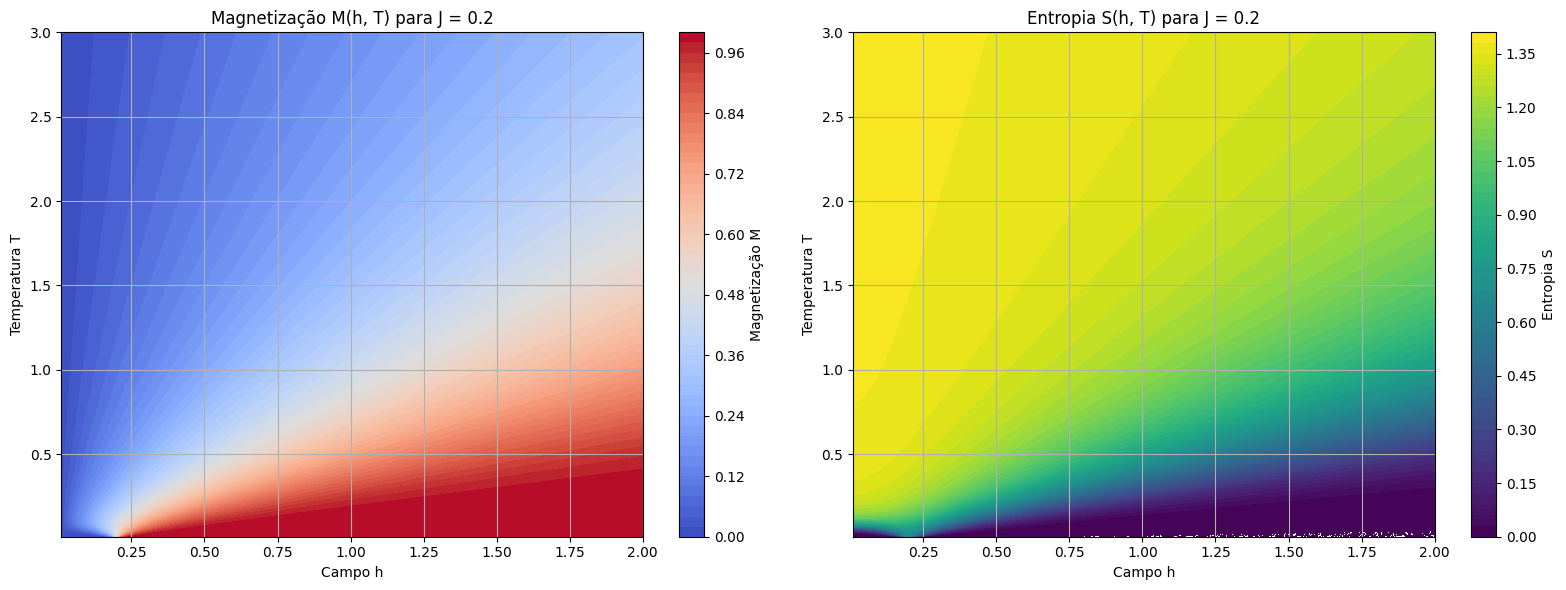

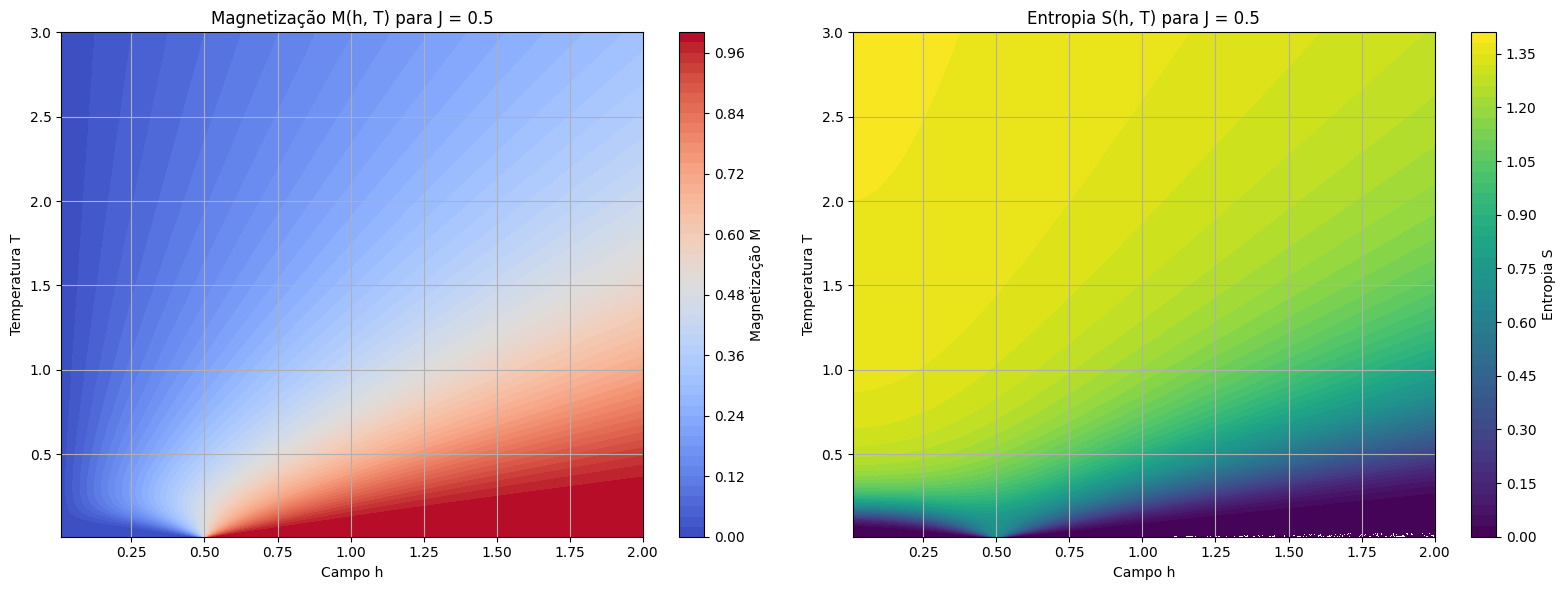

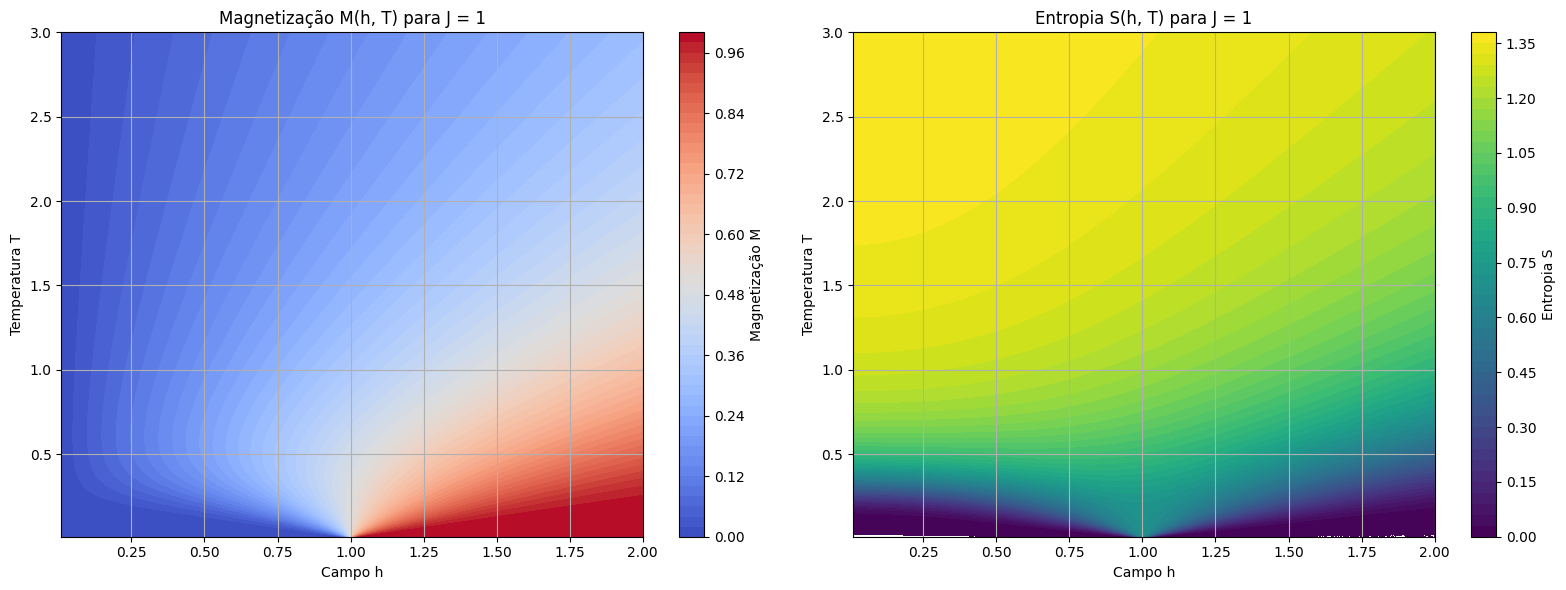

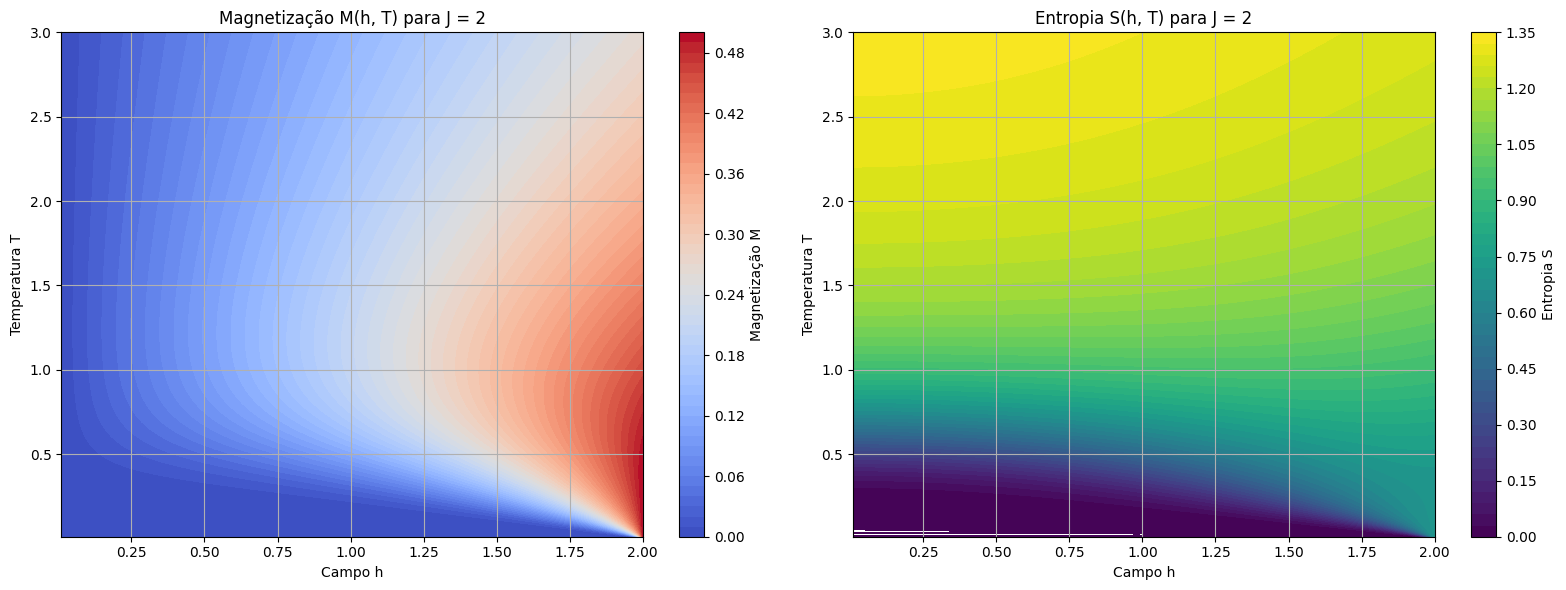

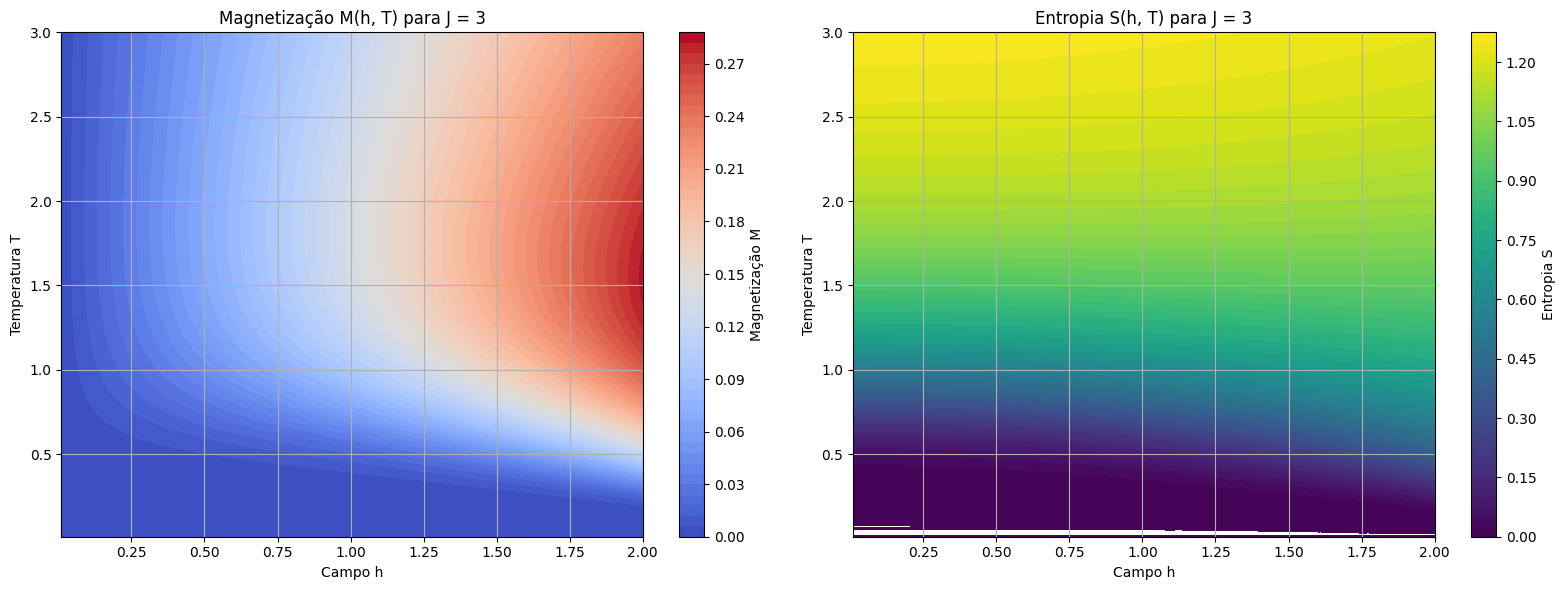

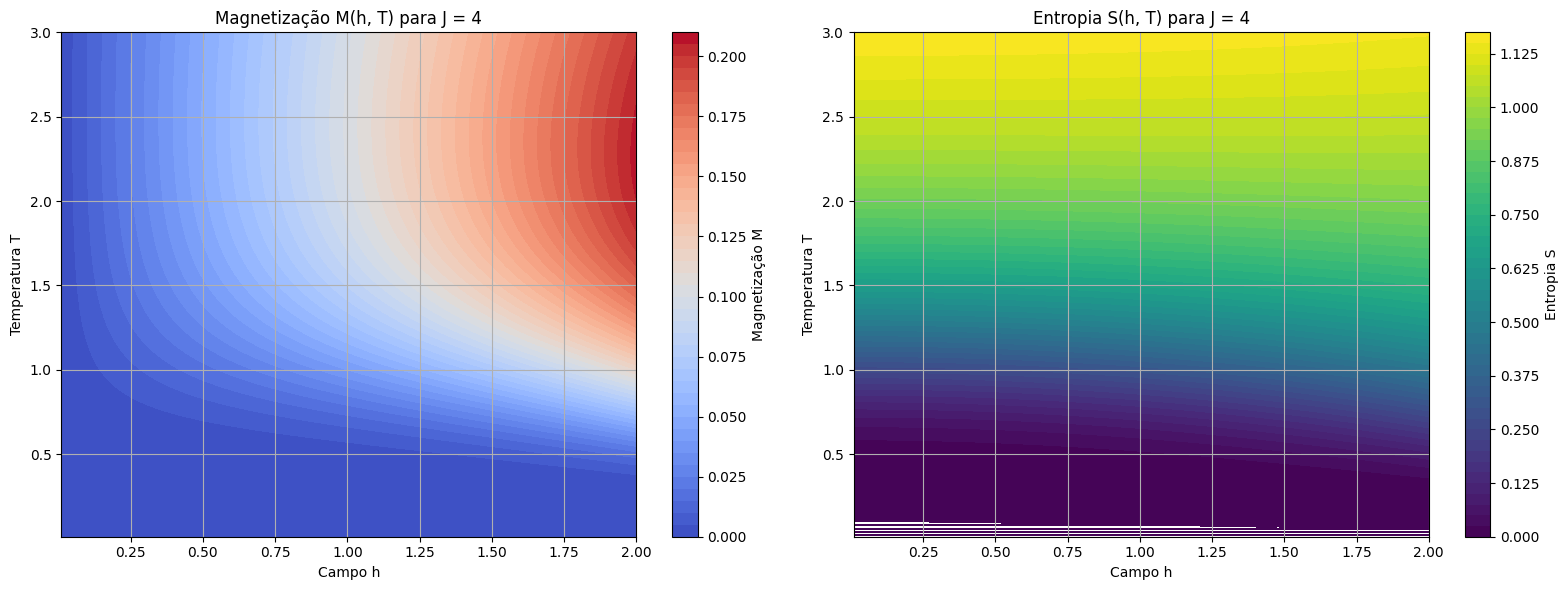

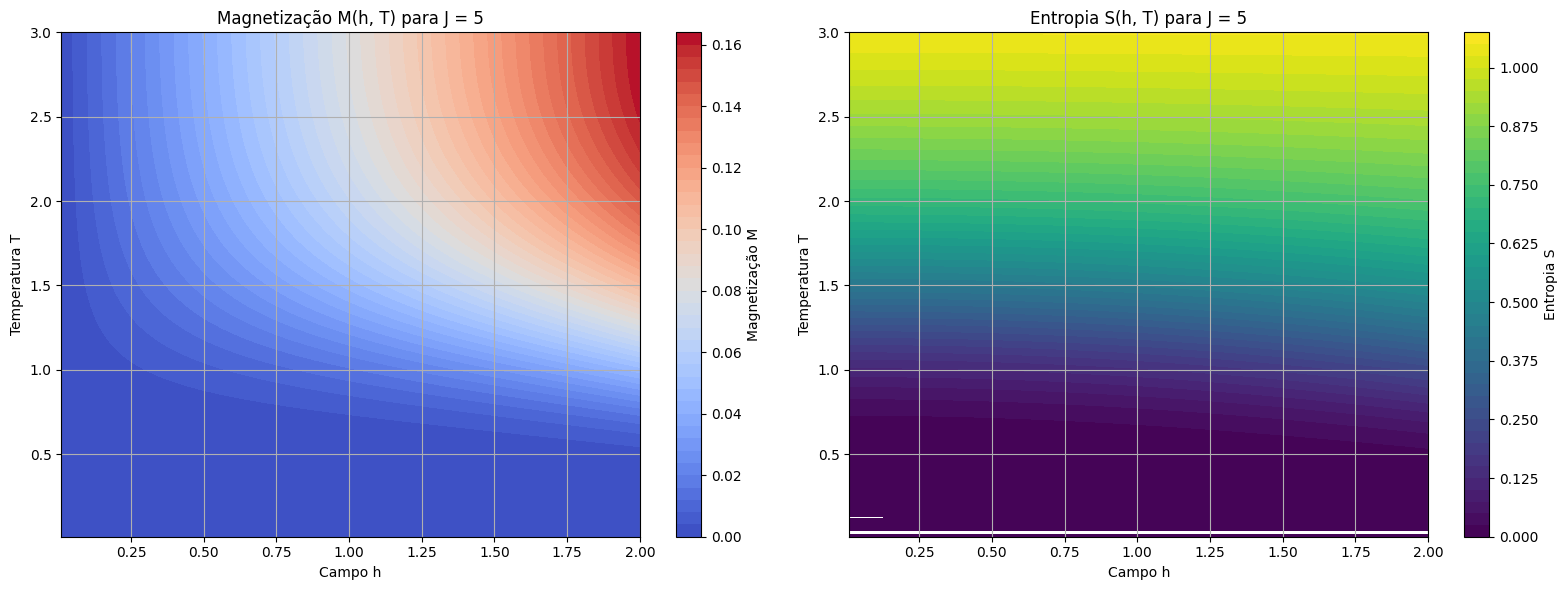

In [16]:
counterplot_M_ht(0)
counterplot_M_ht(0.2)
counterplot_M_ht(0.5)
counterplot_M_ht(1)
counterplot_M_ht(2)
counterplot_M_ht(3)
counterplot_M_ht(4)
counterplot_M_ht(5)

Acho que entendi o counterplot...
Uma duvida... como existe área que eu tenho magnetização e não tenho entropia... teoricamente magnetização e entropia, nesse caso, pelo menos, não são inversamente proporcionais? Quero dizer o seguinte, quando o spins estão "alinhados" eu tenho magnetização e tenho a "menor" entropia, pq o sistema está "organizado"... não?

$\\$
O lance é só para ver que a magnetização muda em algumas regiões em que a entropia é constante? Interessante...

Acho que entendi o counterplot...
Uma duvida... como existe área que eu tenho magnetização e não tenho entropia... teoricamente magnetização e entropia, nesse caso, pelo menos, não são inversamente proporcionais? Quero dizer o seguinte, quando o spins estão "alinhados" eu tenho magnetização e tenho a "menor" entropia, pq o sistema está "organizado"... não?

$\\$
O lance é só para ver que a magnetização muda em algumas regiões em que a entropia é constante? Interessante...

----------

Agora começaremos a construir o que falta para fecharmos o Ciclo de Otto. $\\$
Nesta parte, precisaremos construir uma função capaz de encontrar a temperatura $T$ no final do processo adiabático.$\\$
Você pode se perguntar, o pq disso? Simples de responder, neste sistema nós só temos dois estados de equilíbrio, i.e., quando o sistema está devidamente termalizado com o banho quente (frio), e isso ocorre no final do aquecimento (resfriamento) isocórico.$\\$

Para isso, vamos nos apoiar a termodinâmica e usar o que temos em nossas mãos. No inicio da expansão (compressão) adiabática nós sabemos a temperatura $T_c$ da fonte fria ($T_h$, da fonte quente) e que durante todo processo $\underline{adibático}$ a entropia é constante, i.e., $S(J,hi,T_c) = S(J, hf, addT_c)$, para a compressão, e $S(J, hf, T_h) = S(J, hi, addT_h)$ para a expansão, onde $addT_c$ e $addT_h$ são as respectiva temperaturadas depois da compressão e expansão adiabática. $\\$

Pensamento lógico: Precisamos de uma função $f(J, h_i, h_f, T_i, T_f, S)$, em que $J, h_i, h_f e T_f$ são valores conhecidos, e $h_i$ vai até $h_f$ deixando $T$ livre e $S$ constante para cada valor de $J, h, T$ obtidos durante o processo. $\\$
Para a expansão adiabática: 

Criando a Função capaz de terminar o valor final de $T$ em cada um dos processos $\underline{adibático}.$

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def Temp(J, h, T, entropy):    
    function = (entropy - entropia(J, h, T)) 
    return function

Criando o mencanicos que calcula a temperatura final

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def calcula_T(J, hi, hf, T):
    
    #calculando a entropia para os valores iniciais do problema, e depois precisamos garantir que ela vai ser constante durante todo o processo
    S = round(entropia(J, hi, T), 5)   
    #print(f"entropia incial = {S}")
    
    
    temperature_guess = T
    temperatures = []
    #temperatura_guess é a temperatura inicial do banho quente ou frio, onde há equilibrio termodinamico
    
    
    #criando um linspace de h de hi até hf
    h_values = np.linspace(hi, hf, 20)
    print(f"h_values: {h_values}")
    S_values = np.zeros_like(h_values)
    T_values = np.zeros_like(h_values)
    M_values = np.zeros_like(h_values)
    
    
    for i, h in enumerate(h_values):
        calculed_temperature = fsolve(lambda temperature: Temp(J, h, temperature, S), temperature_guess)
        
        
        T_values[i] = calculed_temperature[0]
        S_values[i] = round(entropia(J, h, T_values[i]), 10)
        S = S_values[i]
        M_values[i] = round(magnetizacao(J, h, T_values[i]), 10)
        
        temperatures.append(calculed_temperature[0])
        
        
        temperature_guess = calculed_temperature[0]
        #print(f"T_values[i] = {T_values[i]}, Temperature_guess = {temperature_guess}, entropia[i] = {S_values[i]}")
    return [h_values, T_values, M_values, S_values, temperature_guess]




In [19]:
temp_returned = calcula_T(0,1,2,3)[4]

print(f"Temperature retornada = {temp_returned}")

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
Temperature retornada = 6.000257778197367


Agora vamos plotar a Temperatura, Entropia e Magnetismo em função do campo magnético $h$ durante o processo adiabático. PS: o fato de ser compressão ou expansão é determinado ao trocar $h_i$ por $h_f$ ao chamar a função $calcula T$

In [20]:
import matplotlib.pyplot as plt

def plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

    for T in T_guesses:
        h_values, T_values, M_values, S_values, T_guess = calcula_T(J, hi, hf, T)

        axes[0].plot(h_values, T_values, label=f"$T_{{guess}} = {T}$")
        axes[1].plot(h_values, S_values, label=f"$T_{{guess}} = {T}$")
        axes[2].plot(h_values, M_values, label=f"$T_{{guess}} = {T}$")

    titles = [f"T vs h  [J = {J}, hi ={hi}, hf = {hf}]", f"S vs h  [J = {J}, hi ={hi}, hf = {hf}]", f"M vs h  [J = {J}, hi ={hi}, hf = {hf}]"]
    ylabels = ['T', 'S', 'M']

    for ax, title, ylabel in zip(axes, titles, ylabels):
        ax.set_xlabel('h')
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.grid(True)
        ax.legend()
    plt.tight_layout()
    plt.show()

In [21]:
import matplotlib.pyplot as plt

def plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
    markers = ['s', 'o', '^', 'D', 'v', '*']

    for idx, T in enumerate(T_guesses):
        h_values, T_values, M_values, S_values, T_guess = calcula_T(J, hi, hf, T)

        color = colors[idx % len(colors)]
        marker = markers[idx % len(markers)]
        label = f"$T_{{guess}} = {T}$"

        
        axes[0].plot(np.arange(1, len(h_values) + 1), M_values, label=label, color=color, marker=marker)
        axes[1].plot(np.arange(1, len(h_values) + 1), S_values, label=label, color=color, marker=marker)
        axes[2].plot(np.arange(1, len(h_values) + 1), T_values, label=label, color=color, marker=marker)

    
    titles = [f"M vs h  [J = {J}, hi ={hi}, hf = {hf}]",f"S vs h  [J = {J}, hi ={hi}, hf = {hf}]",f"T vs h  [J = {J}, hi ={hi}, hf = {hf}]"]
    ylabels = ['M', 'S', 'T']

    for ax, title, ylabel in zip(axes, titles, ylabels):
        ax.set_xlabel('h')
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]


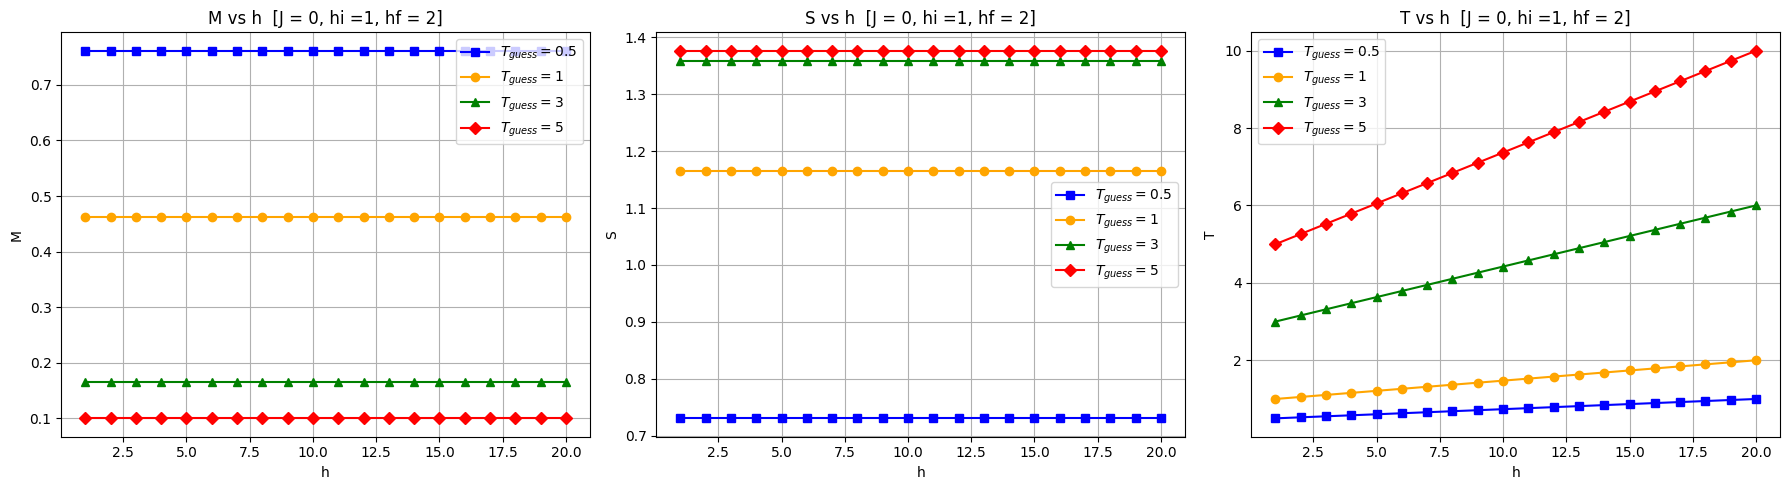

h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


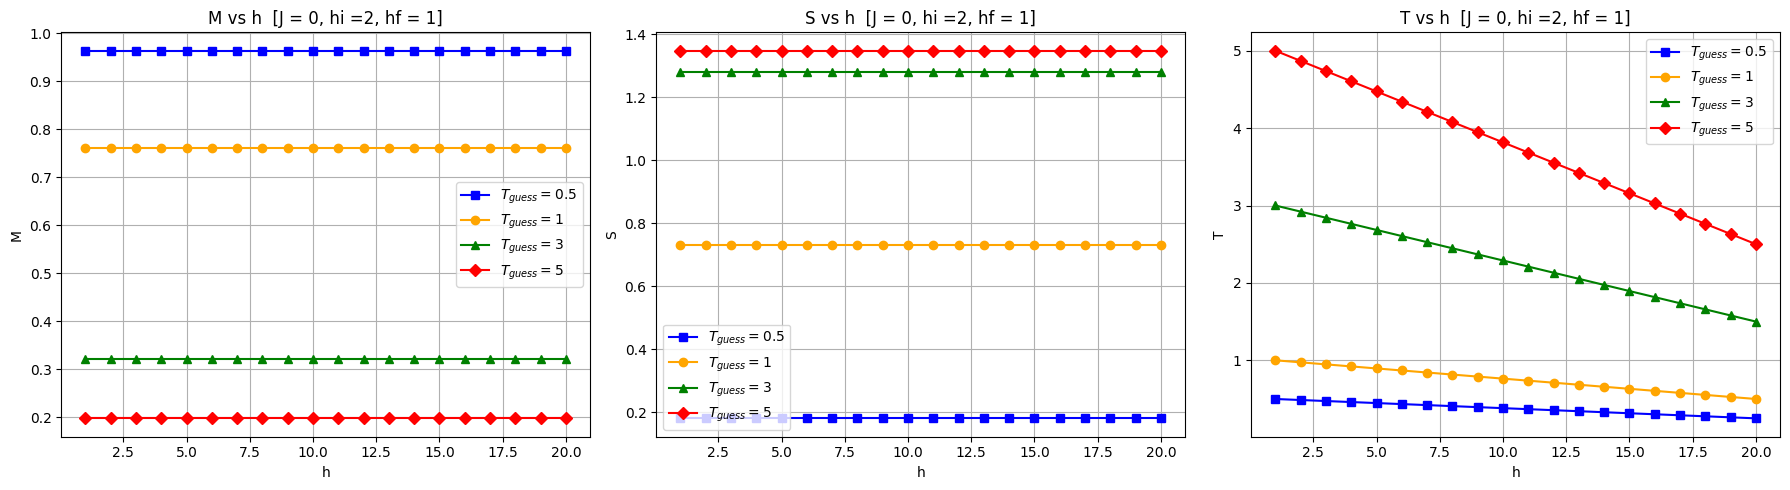

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]


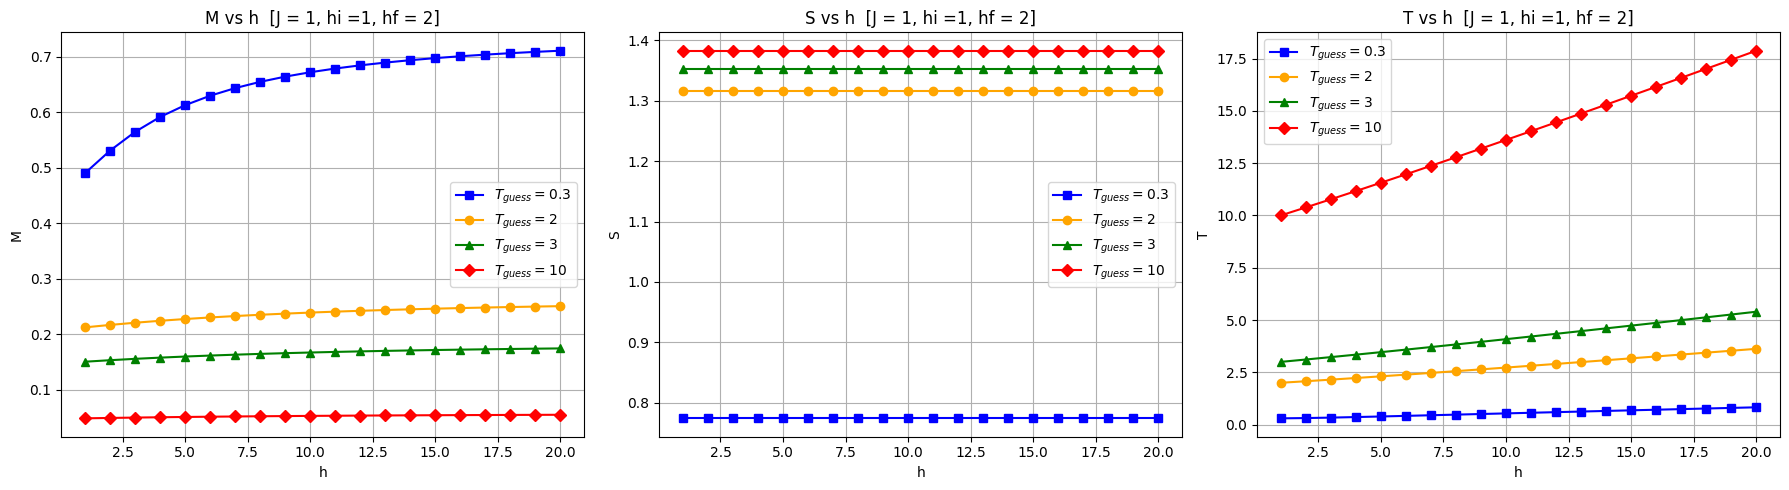

h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


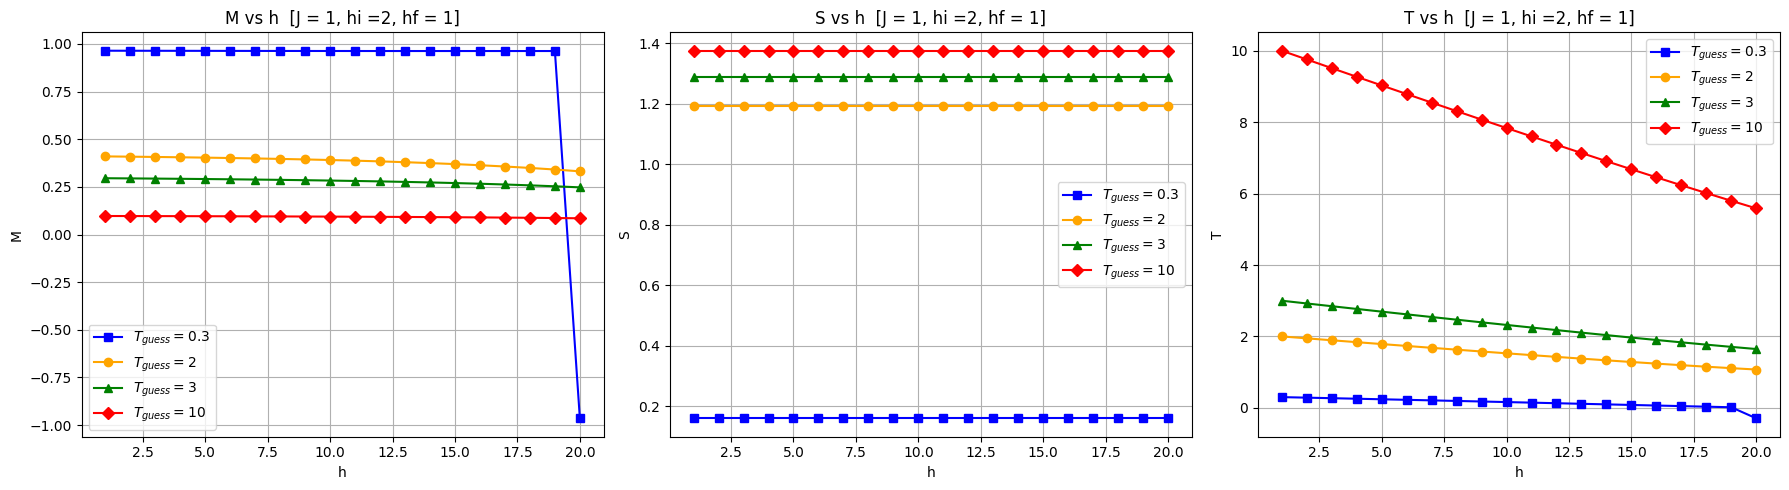

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]


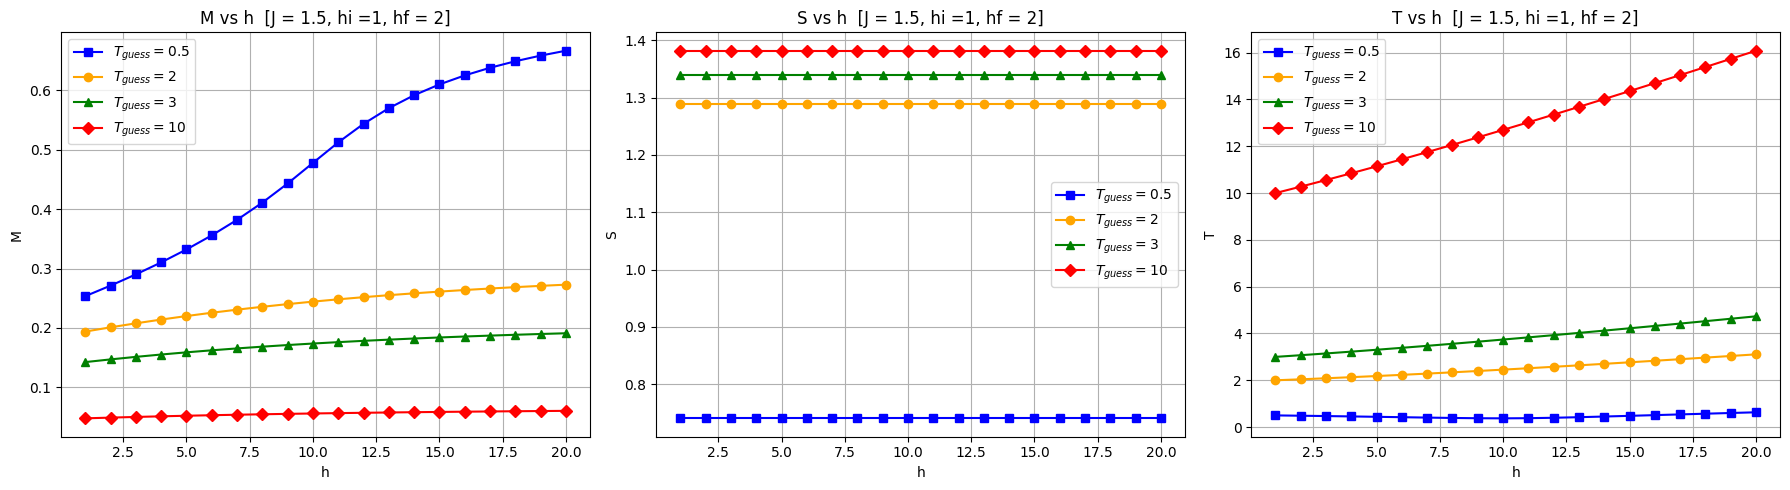

h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


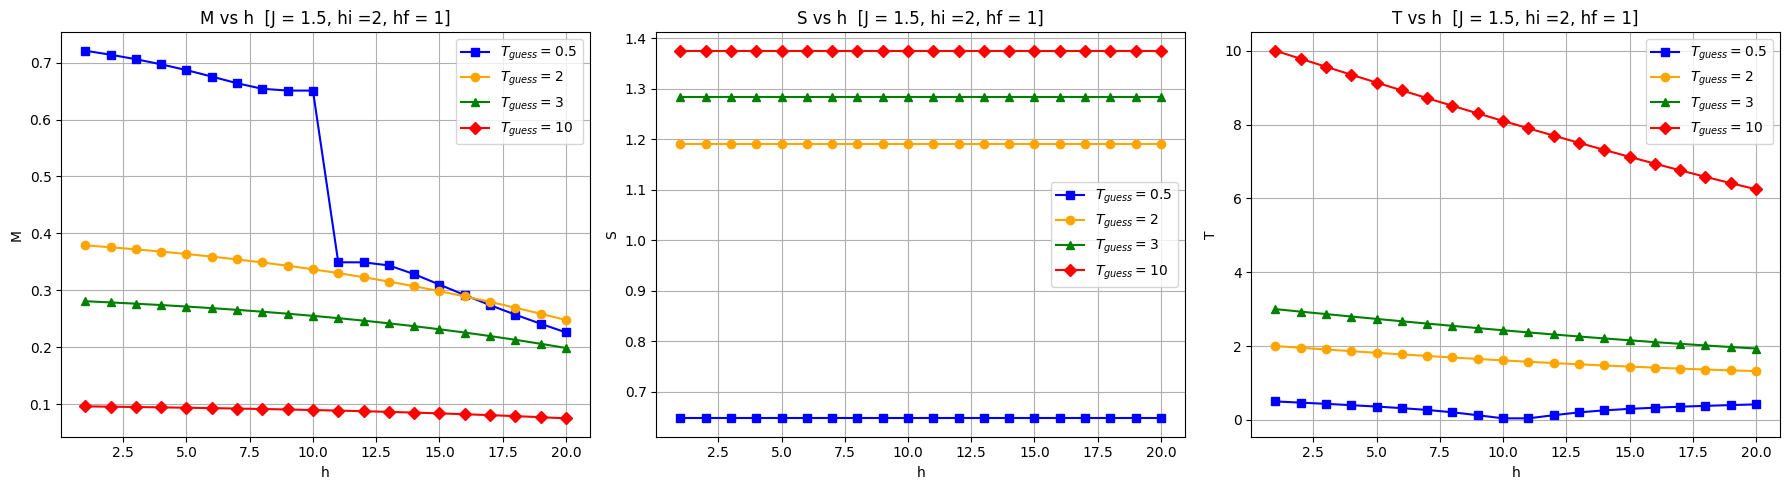

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]


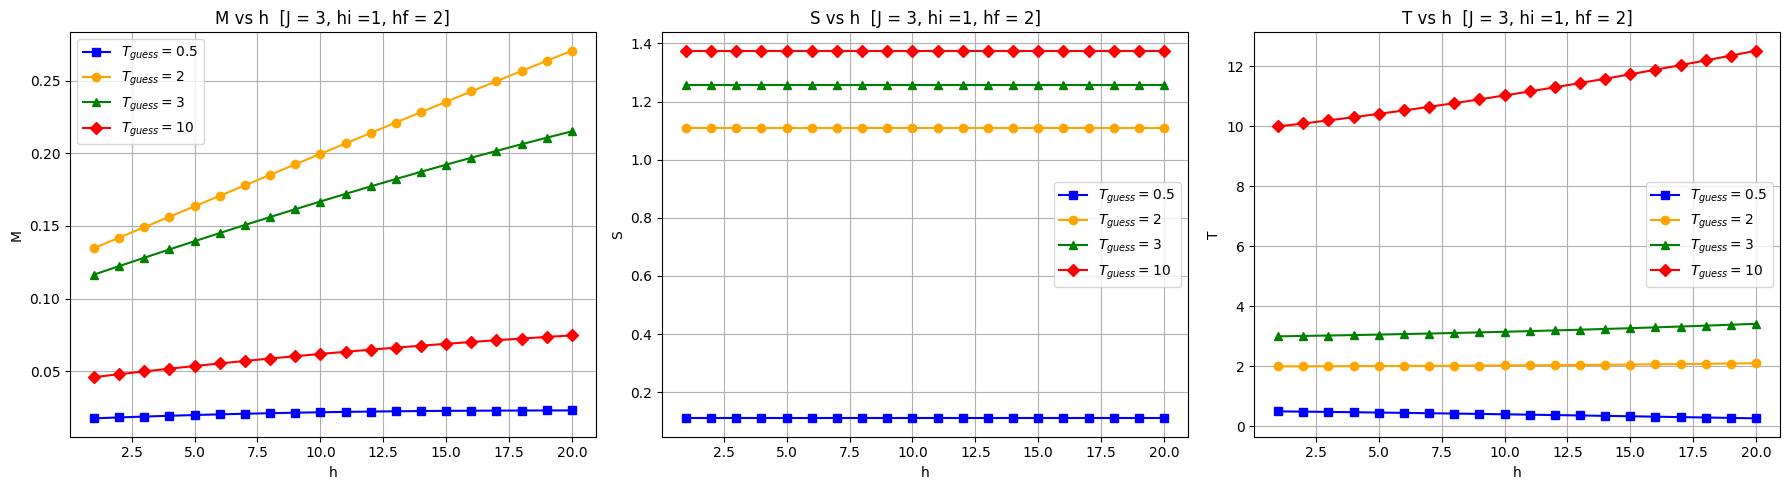

h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


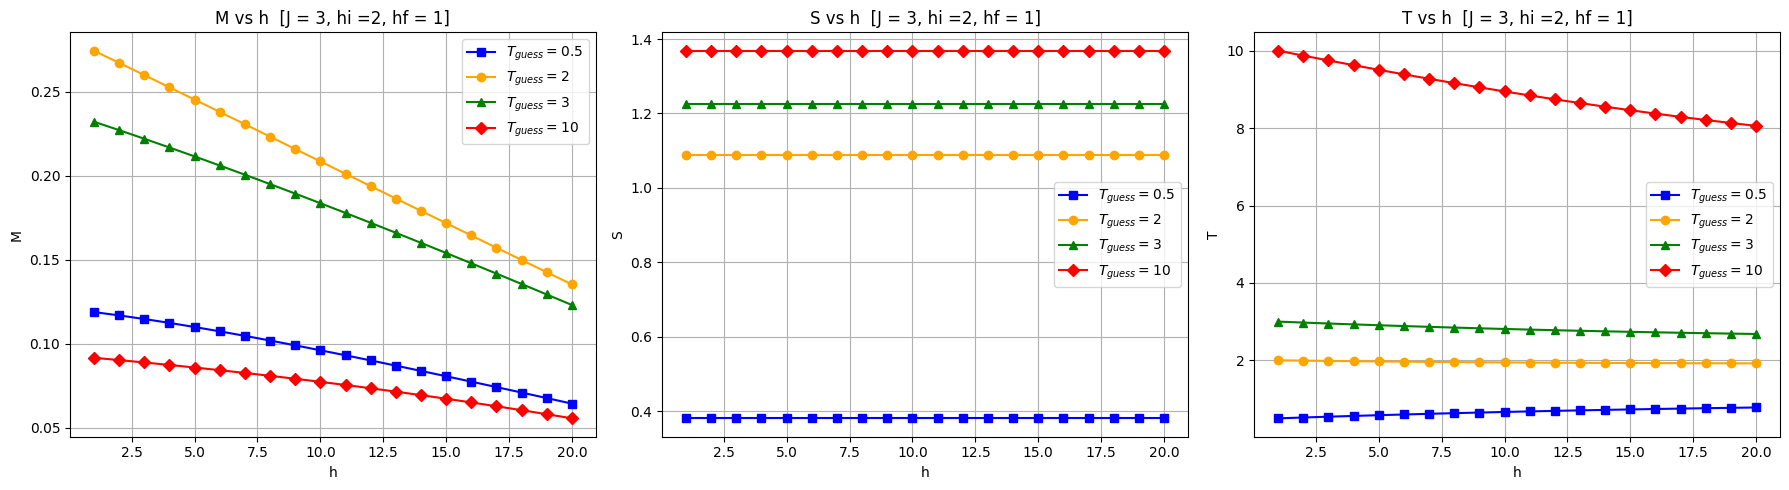

In [22]:
#Indo
J = 0; hi = 1; hf = 2; T_guesses = [0.5, 1, 3, 5]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)
#voltando
J = 0; hi = 2; hf = 1; T_guesses = [0.5, 1, 3, 5]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)


#indo
J = 1; hi = 1; hf = 2; T_guesses = [0.3, 2, 3, 10]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)
#voltando
J = 1; hi = 2; hf = 1; T_guesses = [0.3, 2, 3, 10]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)


#indo
J = 1.5; hi = 1; hf = 2; T_guesses = [0.5, 2, 3, 10]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)
#voltando
J = 1.5; hi = 2; hf = 1; T_guesses = [0.5, 2, 3, 10]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)


#indo
J = 3; hi = 1; hf = 2; T_guesses = [0.5, 2, 3, 10]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)
#voltando
J = 3; hi = 2; hf = 1; T_guesses = [0.5, 2, 3, 10]
plot_BTeBSeBM(J, hi, hf, T_guesses, calcula_T)

--------------------

Agora, vamos buscar mostra que o ciclo é capaz de girar ao contrário. Para isso, vamos determinar dois banhos, um frio e outro quente, e vamos buscar diferentes valores de $h_i$, $h_f$ e $J$ que nos mostre alguma diferença, conforme vamos aumentando o valor de $T_h$, a temperatura do banho quente.

para isso é interesasnte criar uma função que calcule as grandezes indo e voltando


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

def calcula_T_ciclo(J, hi, hf, Tc, Th):
    
    #calculando a entropia para os valores iniciais do problema, e depois precisamos garantir que ela vai ser constante durante todo o processo
    S_c = round(entropia(J, hi, T_c), 5)
    S_h = round(entropia(J, hf, Th), 5)    
    
    temperature_guess_c = Tc
    temperature_guess_h = Th
    temperatures = []
    #temperatura_guess é a temperatura inicial do banho quente ou frio, onde há equilibrio termodinamico
    
    
    #criando um linspace de h de hi até hf
    h_values_i = np.linspace(hi, hf, 10)
    h_values_f = np.linspace(hf, hi, 10)
    print(f"h_values_i: {h_values_i}, h_values_f: {h_values_f}")
    
    S_values_i = np.zeros_like(h_values_i)
    T_values_i = np.zeros_like(h_values_i)
    M_values_i = np.zeros_like(h_values_i)
    
    S_values_f = np.zeros_like(h_values_i)
    T_values_f = np.zeros_like(h_values_i)
    M_values_f = np.zeros_like(h_values_i)    
    
    for i, h in enumerate(h_values_i):
        calculed_temperature_c = fsolve(lambda temperature_c: Temp(J, h, temperature_c, S), temperature_guess_c)
        print(f"temperature_calculed_c: {temperature_guess_c}")
        
        T_values_i[i] = calculed_temperature_c[0]
        S_values_i[i] = round(entropia(J, h, T_values_i[i]), 10)
        S = S_values_i[i]
        M_values_i[i] = round(magnetizacao(J, h, T_values_i[i]), 10)
        
        temperatures.append(calculed_temperature_c[0])
        
        
        temperature_guess_c = calculed_temperature_c[0]
        
    for i, h in enumerate(h_values_f):
        calculed_temperature_f = fsolve(lambda temperature_h: Temp(J, h, temperature_h, S), temperature_guess_h)
        
        T_values_f[i] = calculed_temperature_f[0]
        S_values_f[i] = round(entropia(J, h, T_values_f[i]), 10)
        S = S_values_f[i]
        M_values_f[i] = round(magnetizacao(J, h, T_values_f[i]), 10)
        
        temperatures.append(calculed_temperature_f[0])
        
        
        temperature_guess_h = calculed_temperature_f[0]        
        
    return [h_values_i, T_values_i, M_values_i, S_values_i, temperature_guess_c, h_values_f, T_values_f, M_values_f, S_values_f, temperature_guess_h]

In [244]:
import matplotlib.pyplot as plt

def plot_BTeBSeBM_Spinning(J, hi, hf, Tc, Th, calcula_T):
    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
    markers = ['>', '<', '<', '<', '<', '<', '<', '<', '<', '<', '<']
    #T_list = [Tc] + [Th]
    #hi_hf_list = [(hi,hf)] + ([(hf, hi)]*5)
    
    
    # 1. Primeiro: ida (hi -> hf) com Tc
    h_values, T_values, M_values, S_values, _ = calcula_T(J, hi, hf, Tc)
    axes[0].plot(h_values, M_values, label=f"$T_c = {Tc}$", color=colors[0], marker=markers[0])
    axes[1].plot(h_values, S_values, label=f"$T_c = {Tc}$", color=colors[0], marker=markers[0])
    axes[2].plot(h_values, T_values, label=f"$T_c = {Tc}$", color=colors[0], marker=markers[0])

    
    for idx, T in enumerate(Th):
        color = colors[(idx + 1) % len(colors)]
        marker = markers[(idx + 1)]
        label = f"$T_h = {T}$"

        h_values, T_values, M_values, S_values, _ = calcula_T(J, hf, hi, T)

        axes[0].plot(h_values, M_values, label=label, color=color, marker=marker)
        axes[1].plot(h_values, S_values, label=label, color=color, marker=marker)
        axes[2].plot(h_values, T_values, label=label, color=color, marker=marker)

    
    titles = [f"M vs h  [J = {J}, hi ={hi}, hf = {hf}]",f"S vs h  [J = {J}, hi ={hi}, hf = {hf}]",f"T vs h  [J = {J}, hi ={hi}, hf = {hf}]"]
    ylabels = ['M', 'S', 'T']

    for ax, title, ylabel in zip(axes, titles, ylabels):
        ax.set_xlabel('h')
        ax.set_ylabel(ylabel)
        ax.set_title(title)
        ax.grid(True)
        ax.legend()

    plt.tight_layout()
    plt.show()

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


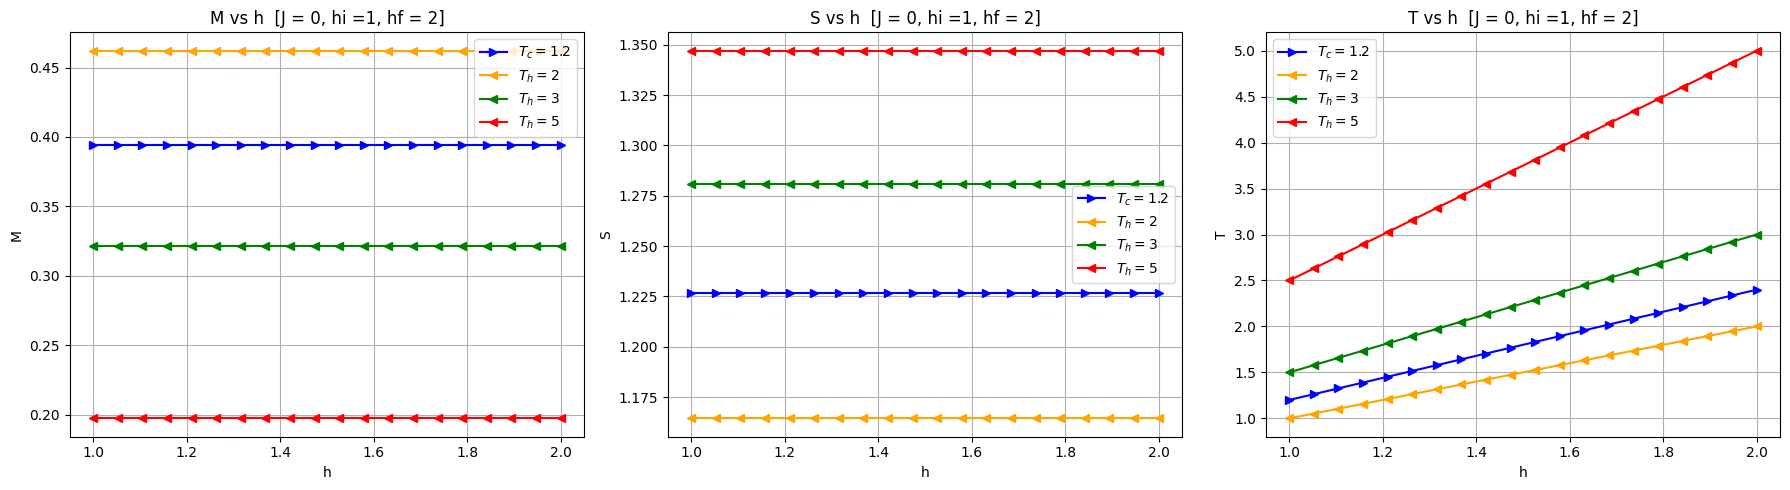

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


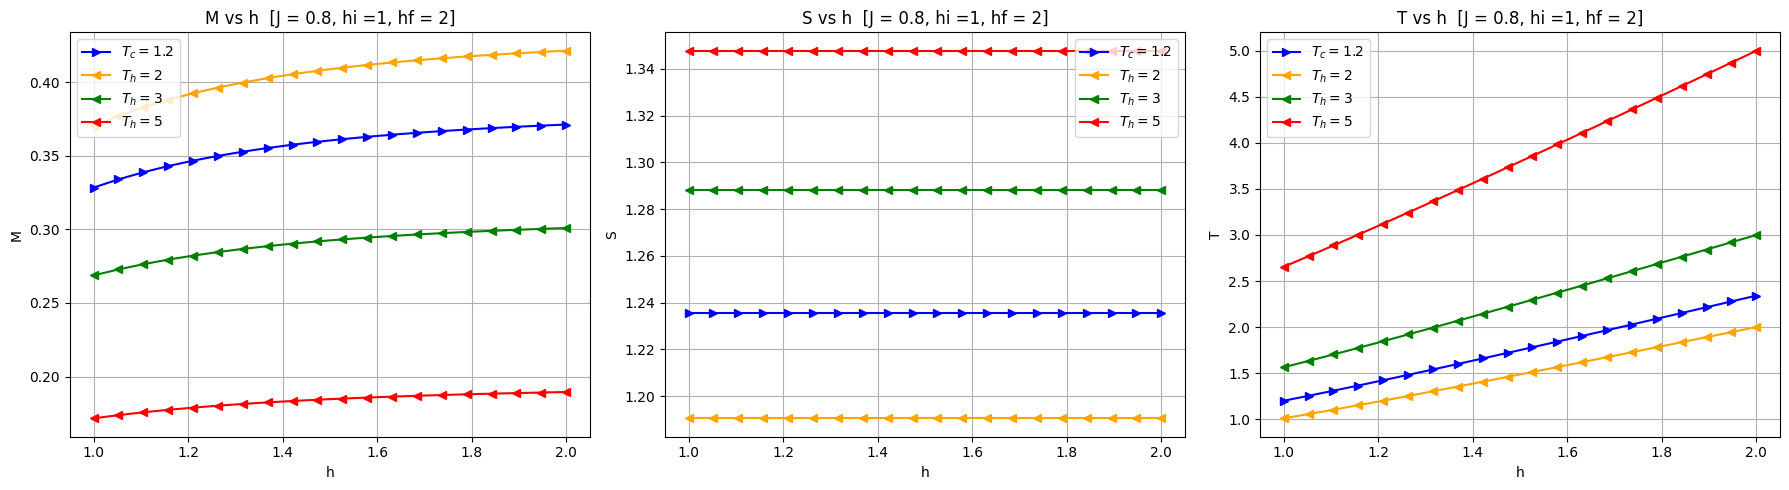

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


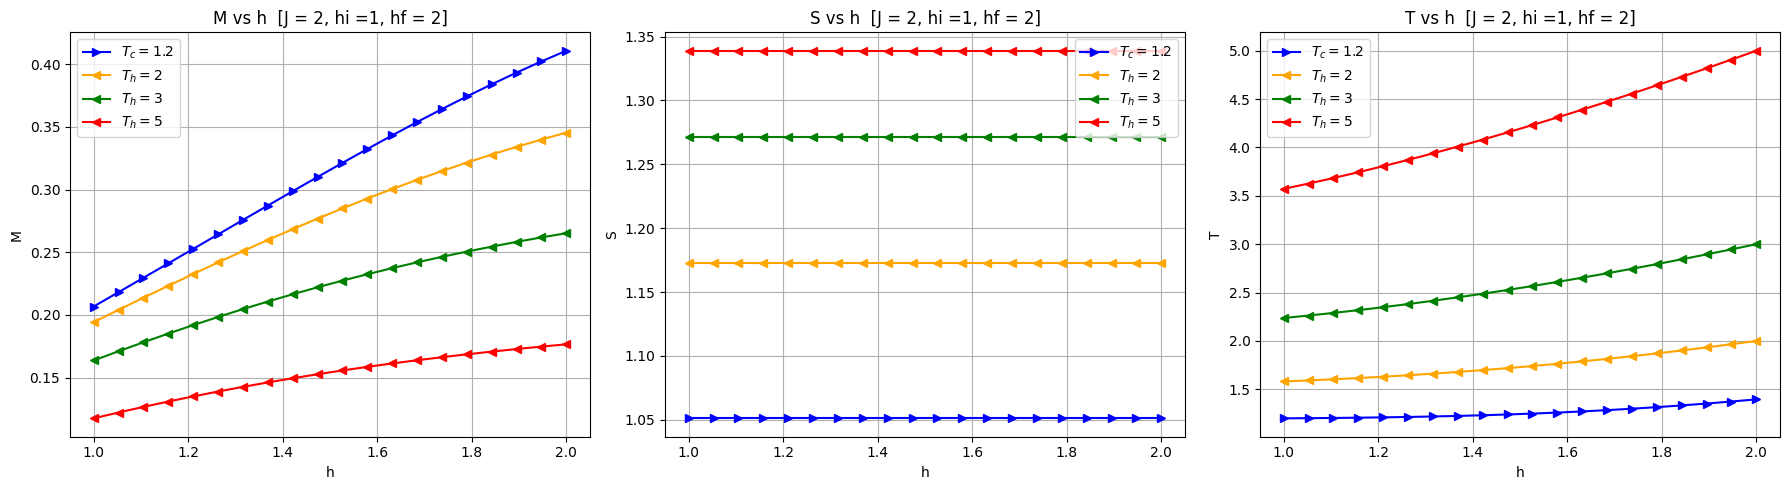

h_values: [2.         2.10526316 2.21052632 2.31578947 2.42105263 2.52631579
 2.63157895 2.73684211 2.84210526 2.94736842 3.05263158 3.15789474
 3.26315789 3.36842105 3.47368421 3.57894737 3.68421053 3.78947368
 3.89473684 4.        ]
h_values: [4.         3.89473684 3.78947368 3.68421053 3.57894737 3.47368421
 3.36842105 3.26315789 3.15789474 3.05263158 2.94736842 2.84210526
 2.73684211 2.63157895 2.52631579 2.42105263 2.31578947 2.21052632
 2.10526316 2.        ]
h_values: [4.         3.89473684 3.78947368 3.68421053 3.57894737 3.47368421
 3.36842105 3.26315789 3.15789474 3.05263158 2.94736842 2.84210526
 2.73684211 2.63157895 2.52631579 2.42105263 2.31578947 2.21052632
 2.10526316 2.        ]
h_values: [4.         3.89473684 3.78947368 3.68421053 3.57894737 3.47368421
 3.36842105 3.26315789 3.15789474 3.05263158 2.94736842 2.84210526
 2.73684211 2.63157895 2.52631579 2.42105263 2.31578947 2.21052632
 2.10526316 2.        ]


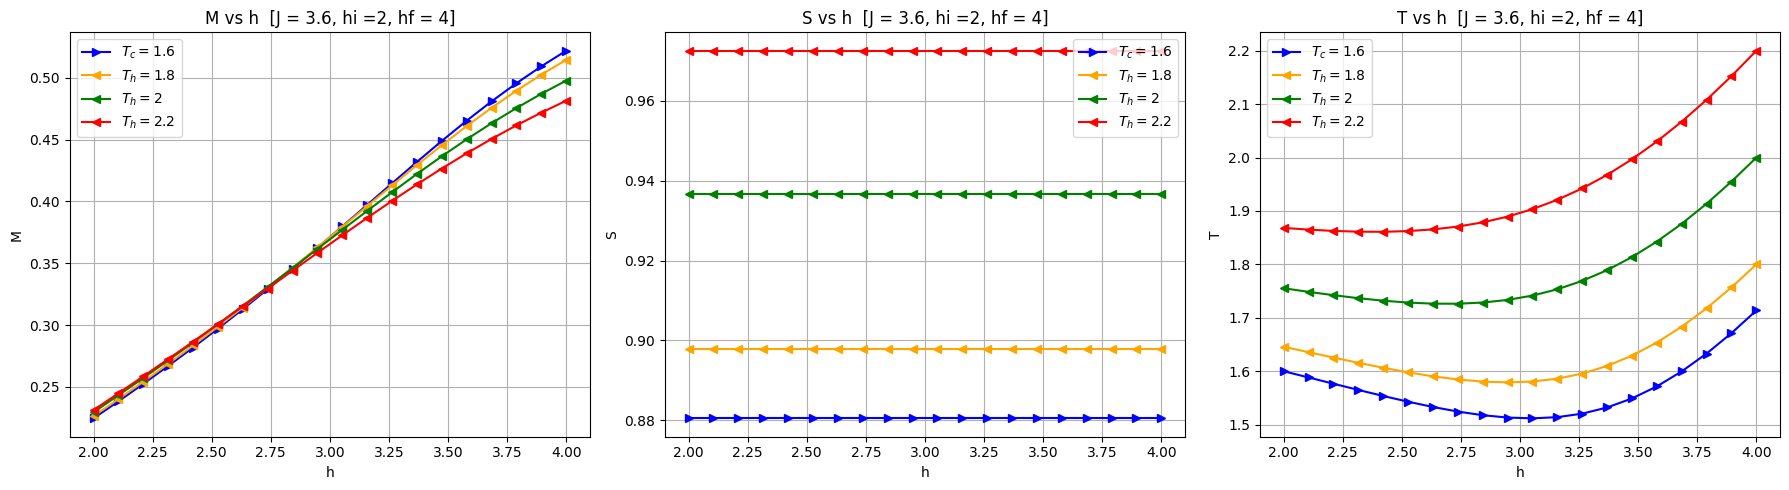

In [250]:
Th = [2,3,5]
J = 0
hi = 1
hf = 2
Tc = 1.2
plot_BTeBSeBM_Spinning(J ,hi ,hf , Tc, Th, calcula_T)


Th = [2,3,5]
J = 0.8
hi = 1
hf = 2
Tc = 1.2
plot_BTeBSeBM_Spinning(J ,hi ,hf , Tc, Th, calcula_T)

Th = [2,3,5]
J = 2
hi = 1
hf = 2
Tc = 1.2
plot_BTeBSeBM_Spinning(J ,hi ,hf , Tc, Th, calcula_T)

Th = [1.8,2,2.2]
J = (8*0.45)
hi = 2
hf = 4
Tc = 1.6
plot_BTeBSeBM_Spinning(J ,hi ,hf , Tc, Th, calcula_T)

h_values: [1.         1.05263158 1.10526316 1.15789474 1.21052632 1.26315789
 1.31578947 1.36842105 1.42105263 1.47368421 1.52631579 1.57894737
 1.63157895 1.68421053 1.73684211 1.78947368 1.84210526 1.89473684
 1.94736842 2.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]
h_values: [2.         1.94736842 1.89473684 1.84210526 1.78947368 1.73684211
 1.68421053 1.63157895 1.57894737 1.52631579 1.47368421 1.42105263
 1.36842105 1.31578947 1.26315789 1.21052632 1.15789474 1.10526316
 1.05263158 1.        ]


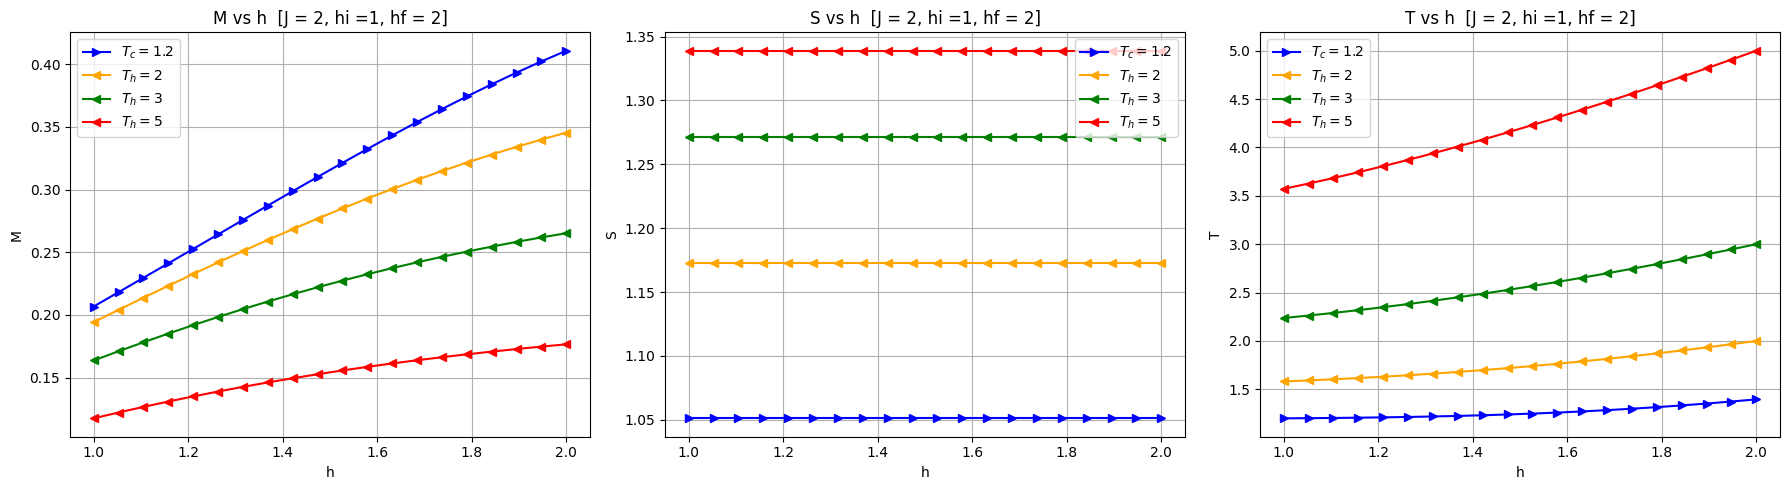

In [248]:
Th = [2,3,5]
J = 2
hi = 1
hf = 2
Tc = 1.2
plot_BTeBSeBM_Spinning(J ,hi ,hf , Tc, Th, calcula_T)